In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import seaborn as sns
from sklearn.datasets import make_blobs


# Normalizador e Encoder

### normalizador

fit_transform(X_train), transform(X_test),

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
X = scaler.transform(df)

X[0:10]

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293]])

### encoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Cria o OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)

# Aplica o OneHotEncoder nas colunas categóricas
encoder.fit(df[['smoker', 'sex', 'day',"time"]]) ## CUIDADO NÃO FAZER 2 FIT --> tira duas categorias no lugar de uma
encoded_data = encoder.transform(df[['smoker', 'sex', 'day',"time"]])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

# Concatena o DataFrame original (sem as colunas categóricas) com o DataFrame codificado
df_encoded = pd.concat([df.drop(['smoker', 'sex', 'day',"time"], axis=1), encoded_df], axis=1)

df_encoded.head()

total_bill   tip  size  smoker_Yes  sex_Male  day_Sat  day_Sun  day_Thur  \
0       25.89  5.16     4         1.0       1.0      1.0      0.0       0.0   
1       13.00  2.00     2         1.0       0.0      0.0      0.0       1.0   
2       17.89  2.00     2         1.0       1.0      0.0      1.0       0.0   
3       28.44  2.56     2         1.0       1.0      0.0      0.0       1.0   
4       12.48  2.52     2         0.0       0.0      0.0      0.0       1.0   

   time_Lunch  
0         0.0  
1         1.0  
2         0.0  
3         1.0  
4         1.0

# Supervisionados X Não Supervisionados

- modelos supervisionados --> preditivo os modelos

- não supervisionados --> modelos mais analíticos.

| Característica             | Aprendizado Supervisionado                                                                                       | Aprendizado não Supervisionado                                                                         |
|----------------------------|------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------|
| Conjunto de Treinamento    | Dados rotulados, entradas e saídas                                                                               | Ausência de um conjunto de treinamento, há apenas dados não rotulados                                  |
| Tipo de Tarefa             | Preditivo                                                                                                        | Analítico                                                                                              |
| Tarefas                    | Regressão e Classificação                                                                                        | Clusterização, detecção de anomalias, redução de dimensionalidade e mineração de regras de associação  |
| Algoritmos                 | Regressão linear e logística, K-vizinhos mais próximos, Árvores de Decisão, SVM, Random Forest, Naive Bayes etc. | Clusterização Hierárquica, Kmédias, Floresta de Isolamento, PCA, SVD, apriori etc.                     |
| Complexidade computacional | Em geral mais simples                                                                                            | Em geral computacionalmente mais complexo                                                              |

## Supervisionados

### Árvore de Decisão

##### teoria

vantagem das arvores é que sabemos os criterios que o sistema utilizou para fazer a classificação

![imagem](https://github.com/Rogerio-mack/BIG_DATA_Analytics_Mineracao_e_Analise_de_Dados/blob/main/figuras/DecisionTreePartitions.png?raw=true)


###### Dicionário

* Partições puras -> nó com apenas um valor categórico||entropia 0 (possuem apenas um elemento)
* Nó terminal -> chega a uma conclusão
* ganho de informação baseado em entropia


##### Criando arvore de Decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier

X = df_labels
y = df['class']

clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(X,y)
y_pred = clf.predict(X)
print( clf.score(X,y) )

1.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier

X = df_labels
y = df['class']

clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(X,y)
y_pred = clf.predict(X)
print( clf.score(X,y) )

1.0


##### Ver árvore 

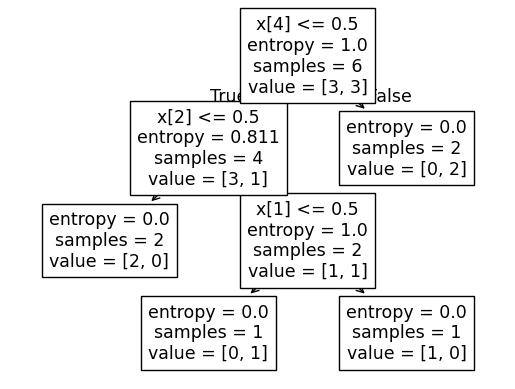

In [ ]:
from sklearn import tree

tree.plot_tree(clf)
plt.show()

In [ ]:
!pip install graphviz --break-system-packages

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 2.8 MB/s eta 0:00:00


In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names=list(df_labels.columns.values),
                     class_names=list(sorted(df['class'].unique())),
                     filled=True, rounded=True,
                     special_characters=False,
                     proportion=False, impurity=False, node_ids=False,label=None)
graph = graphviz.Source(dot_data)
graph.render('graph_cartoons') # para gravação em .pdf
graph

InvalidParameterError: The 'label' parameter of export_graphviz must be a str among {'root', 'none', 'all'}. Got None instead.

In [ ]:
df_tree = pd.concat([df_labels, df['class']], axis=1)

print('Root level')
print(60*'-')
display(df_tree)
print('Continue Next Level...')
display(df_tree[df_tree.cape<=0.5])
print('Terminal')
display(df_tree[df_tree.cape>0.5])

print('\n\n\nSecond level')
print(60*'-')
display(df_tree[df_tree.cape<=0.5])
print('Continue Next Level...')
display(df_tree[(df_tree.cape<=0.5) & (df_tree.tie>0.5)])
print('Terminal')
display(df_tree[(df_tree.cape<=0.5) & (df_tree.tie<=0.5)])

print('\n\n\nThird level')
print(60*'-')
display(df_tree[(df_tree.cape<=0.5) & (df_tree.tie>0.5)])
print('Terminal')
display(df_tree[(df_tree.cape<=0.5) & (df_tree.tie>0.5) & (df_tree.smokes<=0.5) ])
print('Terminal')
display(df_tree[(df_tree.cape<=0.5) & (df_tree.tie>0.5) & (df_tree.smokes>0.5)])

Root level
------------------------------------------------------------


sex  smokes  tie  mask  cape  ears class
0    1       0    0     1     1     1  good
1    1       0    0     1     1     1  good
2    0       0    0     1     0     1   bad
3    1       0    0     0     0     0   bad
4    1       0    1     0     0     0  good
5    1       1    1     0     0     0   bad

Continue Next Level...


sex  smokes  tie  mask  cape  ears class
2    0       0    0     1     0     1   bad
3    1       0    0     0     0     0   bad
4    1       0    1     0     0     0  good
5    1       1    1     0     0     0   bad

Terminal


sex  smokes  tie  mask  cape  ears class
0    1       0    0     1     1     1  good
1    1       0    0     1     1     1  good




Second level
------------------------------------------------------------


sex  smokes  tie  mask  cape  ears class
2    0       0    0     1     0     1   bad
3    1       0    0     0     0     0   bad
4    1       0    1     0     0     0  good
5    1       1    1     0     0     0   bad

Continue Next Level...


sex  smokes  tie  mask  cape  ears class
4    1       0    1     0     0     0  good
5    1       1    1     0     0     0   bad

Terminal


sex  smokes  tie  mask  cape  ears class
2    0       0    0     1     0     1   bad
3    1       0    0     0     0     0   bad




Third level
------------------------------------------------------------


sex  smokes  tie  mask  cape  ears class
4    1       0    1     0     0     0  good
5    1       1    1     0     0     0   bad

Terminal


sex  smokes  tie  mask  cape  ears class
4    1       0    1     0     0     0  good

Terminal


sex  smokes  tie  mask  cape  ears class
5    1       1    1     0     0     0   bad

##### Entropia e Ganho de Informação


Na teoria da informação, a entropia é uma medida de quantidade de informação introduzido por Claude Shannon em seu artigo de 1948 *A Mathematical Theory of Communication*. A entropia de um atributo é o nível médio de informação, surpresa,  ou  ainda incerteza, inerente aos resultados possíveis desse atributo. Ela é definida como:

$$ E(s) = - \sum_i p_i log p_i $$

onde $p_i$ é a probabilidade dos $i$ valores de $s$.

Um *bit*, por exemplo, é a unidade de informação exatamente por que carrega *1* de entropia:      

$$ E(bit) = - p(0) log( p(0) ) - p(1) log( p(1) )  = - \frac{1}{2} log \frac{1}{2} - \frac{1}{2} log \frac{1}{2} = 1  $$

onde $p(0)$ e $p(1)$ são respectivamente as probabilidades do bit $0$ e $1$.

Assim, podemos ver também que a entropia de uma constante é zero, pois não há qualquer incerteza sobre seu valor:     

$$ E(cte) = - 1 log 1 = 0 $$

e é exatamente isso que queremos buscar em um particionamento ao construírmos uma árvore de decisão.

Podemos empregar o pacote `scipy` para determinar a entropia de dados com base nas probabilidades dos diferentes valores e, abaixo, você pode ver a entropia do *bit* e de uma constante.






In [ ]:
from scipy.stats import entropy
E = entropy( [1/2, 1/2] , base=2 )
E

np.float64(1.0)

In [ ]:
E = entropy( 1 , base=2 )
E

np.float64(0.0)

![imagem](https://github.com/Rogerio-mack/BIG_DATA_Analytics_Mineracao_e_Analise_de_Dados/blob/main/figuras/EntropiaGanhoInformacao.png?raw=true)

<small>
<b>
Figura 6. Exemplo do Cálculo de Entropia e Ganho de Informação.

##### Removendo dados com pouca variância

O `VarianceThreshold` permite remover todos os atributos com variância abaixo de um limite e, por padrão, remove todos atributos de variância zero (mesmo valor em todas as amostras), são os dados que não carregam nenhuma informação ou, como você viu entropia $E(cte) = 0$. O


In [ ]:
df_tree.drop(columns=['class']).var()

sex       0.166667
smokes    0.166667
tie       0.266667
mask      0.300000
cape      0.266667
ears      0.300000
dtype: float64

In [ ]:
from sklearn.feature_selection import VarianceThreshold

X = df_tree.drop(columns=['class'])
sel = VarianceThreshold(threshold=0.1)
sel.fit_transform(X)

array([[1, 0, 0, 1, 1, 1],
       [1, 0, 0, 1, 1, 1],
       [0, 0, 0, 1, 0, 1],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [1, 1, 1, 0, 0, 0]])

##### Selecionando atributos com o `SelectKBest`

A seleção univariada de recursos funciona selecionando os melhores atributos com base em testes estatísticos univariados, o que inclui a informação mútua. São 3 métodos, mas que tem o mesmo tipo de princípio:

* `SelectKBest` remove tudo, exceto os atributos de maior pontuação

* `SelectPercentile` remove todos os atributos, exceto a maior porcentagem de pontuação especificada

* `GenericUnivariateSelect`permite realizar a seleção univariada de recursos com uma estratégia configurável

Aplicando o  `SelectKBest` ao nosso exemplo teríamos:

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

X = df_tree.drop(columns=['class'])
y = df_tree['class']

select_features = SelectKBest(mutual_info_classif, k=3).fit(X, y)
print( select_features.get_support() )
print( X.columns[select_features.get_support()] )

X_new = select_features.transform(X)

pd.DataFrame( X_new, columns= X.columns[select_features.get_support()] )

[ True  True False False  True False]
Index(['sex', 'smokes', 'cape'], dtype='object')


sex  smokes  cape
0    1       0     1
1    1       0     1
2    0       0     0
3    1       0     0
4    1       0     0
5    1       1     0

### Cross Validation

Ao particionar os dados disponíveis em três conjuntos, reduzimos drasticamente o número de amostras que podem ser usadas para aprender o modelo.

Uma solução para este problema, como também para buscarmos um resultado menos dependente de uma escolha aleatória particular do par (treino, validação), é uma técnica denominada validação cruzada ou cross validation (CV). Um conjunto de teste ainda deve ser apresentado para avaliação final, mas o conjunto de validação não é mais necessário ao empregar o CV. Em sua forma mais simples, denominada *k-fold CV*, o conjunto de treinamento é dividido em k partições aleatórias menores e o treinamento ocorre do seguinte modo:

> Para as $k$ partições:  

> 1. O modelo é treinado empregando-se $k-1$ partições dos dados de treinamento;

> 2. O modelo resultante é validado na parte restante dos dados, isto é, é usado como conjunto de teste para calcular a métrica de desempenho, por exemplo a acuracidade ou a precisão.

A medida de desempenho do CV é, então, a média dos valores calculados para as $k$ medidas. Embora computacionalmente cara, o CV não desperdiça e é um procedimento mais sistemático que garante que todos os dados serão testados pelo modelo em algum momento.

<br>

<br>

![imagem](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

<small>
<b>
Figura 1. Esquema de Cross-Validation. <br></b>  (Fonte: https://scikit-learn.org)

In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import neighbors
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/MASS/biopsy.csv',index_col=0)
df['V6'] = df[['V6']].fillna(df['V6'].mean())

X = df.drop(columns=['ID','class'])
y = df['class']

scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

clf = neighbors.KNeighborsClassifier(n_neighbors = 3, metric= 'euclidean' )

acc_scores = cross_val_score(clf, X_train, y_train, cv = 10)

print(acc_scores, '\n')
print("accuracy: %0.3f +/- %0.3f" % (acc_scores.mean(), acc_scores.std() * 2),'\n')

for metric in ['accuracy','f1_macro','precision_macro','recall_macro']:
  scores = cross_val_score(clf, X_train, y_train, cv = 4, scoring=metric)
  print(metric + ": %0.3f +/- %0.3f" % (scores.mean(), scores.std() * 2))


[0.97959184 0.97959184 1.         0.97959184 0.95918367 0.95918367
 1.         0.93877551 0.97959184 0.95833333] 

accuracy: 0.973 +/- 0.037 

accuracy: 0.973 +/- 0.021
f1_macro: 0.971 +/- 0.024
precision_macro: 0.972 +/- 0.027
recall_macro: 0.970 +/- 0.023


### Escolha de hiperparamtros

In [73]:
clf = neighbors.KNeighborsClassifier()
clf.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier()>

In [74]:
# e do mesmo modo os hiperparâmetros da regressão logística são também obtidos
from sklearn.linear_model import LogisticRegression
LogisticRegression().get_params

<bound method BaseEstimator.get_params of LogisticRegression()>

In [75]:
# e do mesmo modo os hiperparâmetros da regressão logística são também obtidos
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3, criterion='entropy')
clf.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(criterion='entropy', max_depth=3)>

In [76]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/MASS/biopsy.csv',index_col=0)
df['V6'] = df[['V6']].fillna(df['V6'].mean())

X = df.drop(columns=['ID','class'])
y = df['class']

scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

base_estimator = neighbors.KNeighborsClassifier()
param_grid = {'n_neighbors': [3,4,5,6,7,8,9,10], 'metric': ['euclidean','manhattan']}

##AQUI
clf = GridSearchCV(base_estimator, param_grid, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)

# print(clf.cv_results_)
print(clf.best_estimator_)

print()
print("Detailed classification report:")
print()
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print()



KNeighborsClassifier(metric='euclidean')

Detailed classification report:

              precision    recall  f1-score   support

      benign       0.95      0.96      0.95       138
   malignant       0.92      0.90      0.91        72

    accuracy                           0.94       210
   macro avg       0.93      0.93      0.93       210
weighted avg       0.94      0.94      0.94       210




##### exe 2

In [77]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/MASS/biopsy.csv',index_col=0)
df['V6'] = df[['V6']].fillna(df['V6'].mean())

X = df.drop(columns=['ID','class'])
y = df['class']

scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

base_estimator = RandomForestClassifier(random_state=123)
param_grid = {'n_estimators':[3,4,5,6],'criterion':['gini','entropy'],'max_depth':[2,3,4,5]}

clf = GridSearchCV(base_estimator, param_grid, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)

print(clf.cv_results_)
print(clf.best_estimator_)

print()
print("Detailed classification report:")
print()
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print()





{'mean_fit_time': array([0.00373635, 0.00304122, 0.00364408, 0.00399117, 0.00231709,
       0.00285187, 0.00376201, 0.00408092, 0.00240541, 0.00296364,
       0.00342736, 0.00409732, 0.00246739, 0.00296435, 0.00353703,
       0.00404892, 0.00234952, 0.00292716, 0.00522866, 0.00402651,
       0.00252032, 0.00292745, 0.00345774, 0.00400906, 0.00257792,
       0.0030076 , 0.0036674 , 0.00408297, 0.00241528, 0.00298858,
       0.0035234 , 0.00406084]), 'std_fit_time': array([1.96577855e-03, 3.09146235e-04, 2.28535947e-04, 2.72046000e-04,
       3.65835733e-05, 7.03376995e-05, 5.62400431e-04, 1.06475997e-04,
       6.82503739e-05, 8.34937098e-05, 7.28910131e-05, 5.98729010e-05,
       8.07315023e-05, 6.80258972e-05, 6.55307853e-05, 8.06803117e-05,
       9.96565248e-05, 8.21861177e-05, 1.09844317e-03, 2.39046063e-04,
       2.32554074e-04, 8.70486574e-05, 7.07871788e-05, 8.52662175e-05,
       1.87576405e-04, 8.11772934e-05, 1.37315475e-04, 1.00868181e-04,
       7.53029296e-05, 9.92932522e

## Clustering - metodo não supervisionados 

No clustering o objetivo é buscar agrupamentos, clusters ou ainda aglomerados, dos dados. 


Existem diferentes técnicas de clusterização que podemos classificar da seguinte forma:

* Abordagens baseadas em centroid, como Kmeans e Kmedoids
* Abordagens hierárquicas de agrupamento, como clusterização divisiva e de aglomeração
* Abordagens de clustering baseadas em distribuição, como modelos de mistura gaussiana
* Técnicas baseadas em densidade, como dbscan


### Kmeans

In [3]:

from sklearn.cluster import KMeans

In [4]:
# Prepara os dados de entrada do estimador
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Configura e instancia o estimador
clf = KMeans(n_clusters = 4 , random_state= 1984)  # seed, para a reprodutibilidade dos resultados

# Ajusta o estimador aos dados
clf.fit(X)

# Obtém os resultados do modelo
labels = clf.labels_
centroids = clf.cluster_centers_

print(labels)
print(centroids)

[2 3 0 3 2 2 1 0 3 3 1 3 0 3 2 0 0 2 1 1 2 2 0 1 1 0 2 0 1 0 3 3 0 3 3 3 3
 3 1 2 0 1 0 0 1 1 3 1 3 2 1 2 3 2 2 1 3 1 3 2 3 0 3 1 1 1 3 2 3 1 0 1 3 1
 1 3 1 0 2 3 2 0 2 2 3 0 2 0 3 3 0 2 3 1 1 0 2 2 0 1 3 2 3 2 0 2 2 0 3 0 1
 1 2 3 2 0 3 2 2 0 1 2 1 2 2 2 2 1 2 1 3 1 1 2 3 1 1 3 0 3 3 1 0 1 0 1 3 0
 3 3 3 0 3 0 2 1 3 1 2 0 3 0 0 2 0 1 1 0 2 0 0 3 2 0 1 3 2 2 0 1 2 0 1 1 0
 0 0 0 2 3 0 1 0 0 1 1 1 0 1 3 0 1 2 1 0 3 1 3 0 3 0 1 0 0 3 1 1 2 2 0 3 2
 2 1 2 1 0 3 3 0 0 3 0 2 1 0 2 1 3 1 2 0 2 3 3 3 3 1 1 3 0 1 2 0 1 1 1 2 2
 3 0 0 1 2 3 1 0 3 0 2 2 1 1 0 2 2 2 0 3 3 2 2 0 2 2 2 3 1 3 0 2 2 3 3 3 2
 2 0 3 1]
[[ 0.94973532  4.41906906]
 [-1.58438467  2.83081263]
 [ 1.98258281  0.86771314]
 [-1.37324398  7.75368871]]


#### visualizando

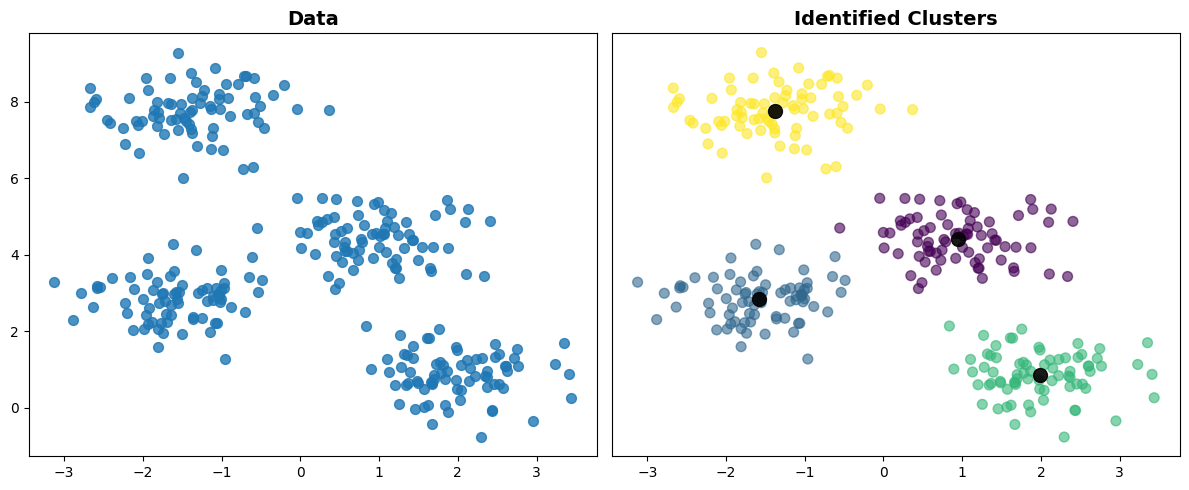

In [5]:
f = plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.8)
plt.title('Data', fontsize=14, weight='bold')

plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.6, c=labels)
plt.title('Identified Clusters', fontsize=14, weight='bold')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100, alpha=0.9);
plt.yticks([])

plt.tight_layout()
plt.show()



#### Exemplo

In [7]:
df= pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/USArrests.csv',index_col=0)
df.head()

Murder  Assault  UrbanPop  Rape
rownames                                   
Alabama       13.2      236        58  21.2
Alaska        10.0      263        48  44.5
Arizona        8.1      294        80  31.0
Arkansas       8.8      190        50  19.5
California     9.0      276        91  40.6

Os dados encontram-se em escalas diferentes. O Kmeans emprega distância como medida de similaridade e é, portanto, sensível à normalização dos dados. Vamos assim normalizar os dados e empregaremos aqui o método `StandardScaler` que normaliza os dados com média zero e desvio padrão $1$ ($z$-score).

$$ z_i = \frac{x_i - \mu}{\sigma(x)} $$

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
X = scaler.transform(df)

X[0:10]

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293]])

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[['Murder', 'UrbanPop']])
X = scaler.transform(df[['Murder', 'UrbanPop']])

# Configura e instancia o estimador
clf = KMeans(n_clusters = 4 , random_state= 1984)  # seed, para a reprodutibilidade dos resultados

# Ajusta o estimador aos dados
clf.fit(X) # somente os atributos Murder e UrbanPop

# Obtém os resultados do modelo
labels = clf.labels_
centroids = clf.cluster_centers_

print(labels)
print(centroids)

[0 0 2 0 2 1 1 1 2 0 1 3 2 1 3 1 0 0 3 0 1 2 1 0 1 3 1 2 3 2 2 2 0 3 1 1 1
 1 1 0 3 0 2 1 3 1 1 3 1 1]
[[ 1.19825217 -0.7863109 ]
 [-0.5352834   0.43337823]
 [ 0.74030529  1.10682426]
 [-1.0975732  -1.23182081]]


In [10]:
df['Cluster'] = labels
df.head(10)

Murder  Assault  UrbanPop  Rape  Cluster
rownames                                             
Alabama        13.2      236        58  21.2        0
Alaska         10.0      263        48  44.5        0
Arizona         8.1      294        80  31.0        2
Arkansas        8.8      190        50  19.5        0
California      9.0      276        91  40.6        2
Colorado        7.9      204        78  38.7        1
Connecticut     3.3      110        77  11.1        1
Delaware        5.9      238        72  15.8        1
Florida        15.4      335        80  31.9        2
Georgia        17.4      211        60  25.8        0

#### Analise dos Clusteres

In [16]:
df.groupby('Cluster').mean()

Murder     Assault   UrbanPop       Rape
Cluster                                             
0        12.954545  238.272727  54.272727  23.627273
1         5.480000  133.600000  71.750000  19.540000
2        10.980000  256.000000  81.400000  31.110000
3         3.055556   76.111111  47.888889  11.088889

In [17]:
scaler.inverse_transform(centroids)

array([[12.95454545, 54.27272727],
       [ 5.48      , 71.75      ],
       [10.98      , 81.4       ],
       [ 3.05555556, 47.88888889]])

IndexError: index 2 is out of bounds for axis 0 with size 2

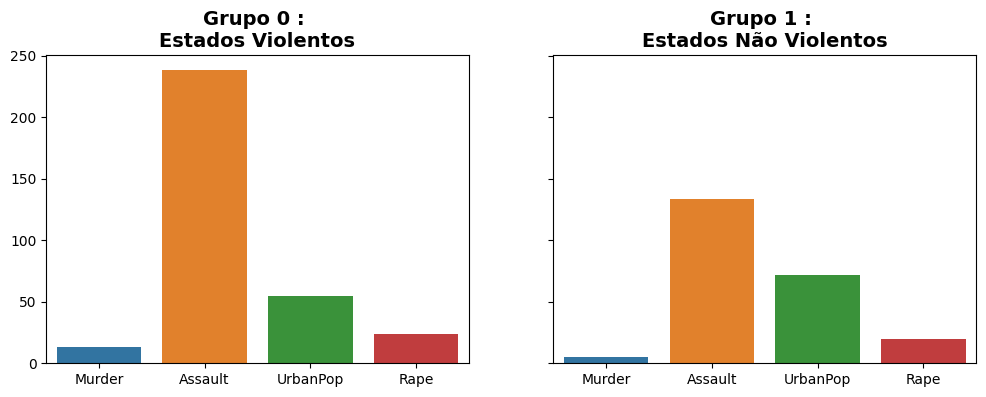

In [18]:
g = pd.DataFrame( df.groupby('Cluster').mean() ).reset_index()

fig, ax = plt.subplots(1,2,figsize=(12,4),sharey=True)

nomes = ['Estados Violentos','Estados Não Violentos']

for i in range(len(g)):
  sns.barplot(data=g[g.Cluster==i].drop(columns='Cluster'),ax=ax[i])
  ax[i].set_title('Grupo ' + str(i) + ' : \n' + nomes[i], fontsize=14, weight='bold')

plt.tight_layout()
plt.show()



### Clustering Hierárquico

A ideia da clusterização hierárquica é a mesma do Kmédias. Mas o seu algoritmo parte de princípios bastante diferentes produzindo assim agrupamentos de dados que podem divergir bastante dependendo dos dados.


* No *Cluster Aglomerativo* os agrupamentos são feitos de "de baixo para cima", cada amostra começa em seu próprio agrupamento, e pares de agrupamentos são organizados a medida que sobe a hierarquia.

* No *Cluster Divisivo*, a construção é "de cima para baixo", com todas as amostras começam em um cluster, e as divisões são realizadas recursivamente à medida que se desce na hierarquia dos dados.

O resultado do agrupamento hierárquico fornece uma estrutura que organiza os itens de dados em um *dendrograma*.

In [26]:
from sklearn.cluster import AgglomerativeClustering

clf = AgglomerativeClustering(n_clusters=2)
# clf = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
# clf = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

clf.fit(X)

# Resultados
labels = clf.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


#### Dedograma

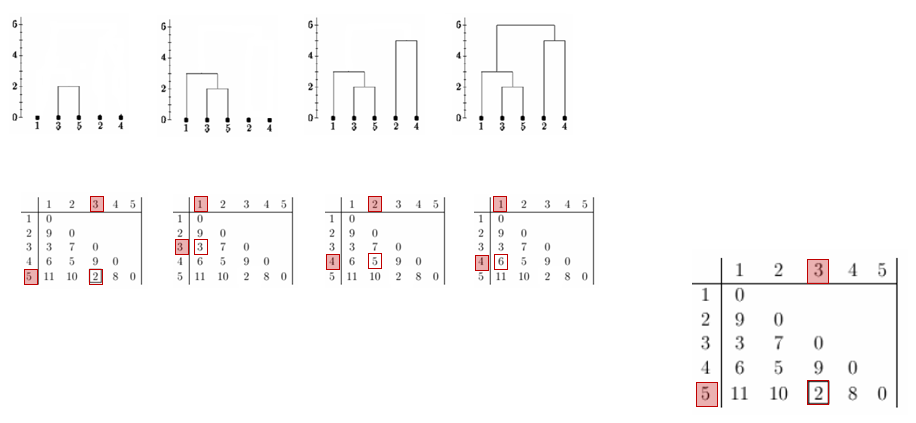
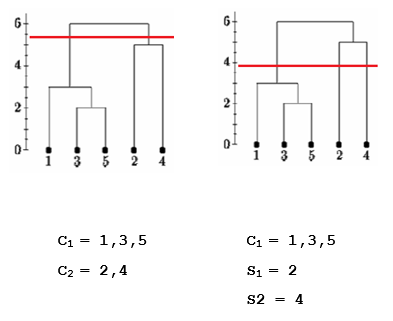

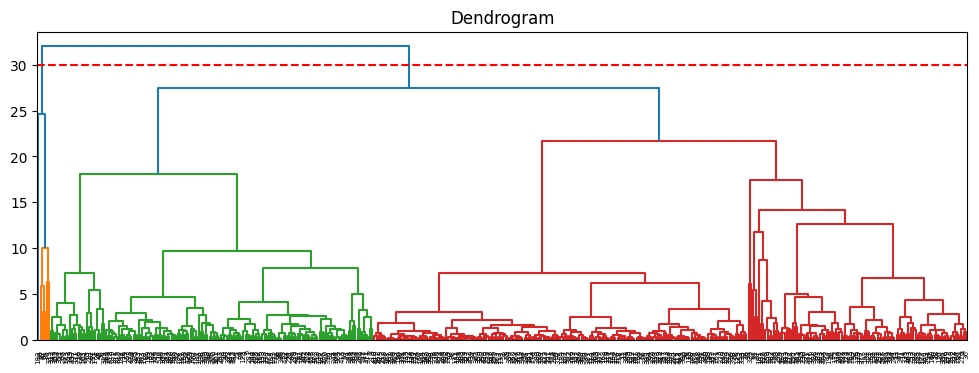

In [29]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

f, ax = plt.subplots(1,1,figsize=(12,4),sharey=True)

ax.set_title("Dendrogram")
plt.xticks(rotation=90)

dendrogram = shc.dendrogram(shc.linkage(X, method='ward'))
ax.axhline(y=30, color='r', linestyle='--')

plt.show()

Observando o dendograma você pode notar que 2 clusters não parece uma divisão interessante dos dados e o diagrama ainda sugere que 3 clusters teriam mais sentido para nossos dados.

Vamos então refazer a clusterização para 3 clusters.

#### Exemplo

In [20]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv')
df.head()


Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

In [21]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [22]:
df = df.drop(columns=['Channel','Region'])

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
X = scaler.transform(df)

X[0:10]

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       [ 0.10011141, -0.62401993, -0.3929769 ,  0.6871443 , -0.49858822,
         0.09341105],
       [ 0.84023948, -0.05239645, -0.07935618,  0.17385884, -0.23191782,
         1.29934689],
       [-0.20480553,  0.33406659, -0.29763704, -0.49615501, -0.22813824,
        -0.02622403],
       [ 0.00995035, -0.35231565, -0.10284877, -0.53451222,  0.05428041,
        -0.34785425],
       [-0.34998145, -0.11398095,  0.15535895, -0.28931479,  0.09228619,
         0.36960125],
       [-0.47790091, -0.2914094 , -0.18533618, -0.54585441, -0.2447264 ,
        -0.2750792 ],
       [-0.47449712,  0.7184949 ,  1.1514234 , -0.39448778,  0.95403053,
         0.20346113]])

In [24]:
for n_clusters in range(2,11):
  clf = KMeans(n_clusters = n_clusters , random_state= 1984)
  clf.fit(X)
  labels = clf.labels_
  print('Silhueta média para', n_clusters , 'clusters: ', np.round( metrics.silhouette_score(X, labels, metric='euclidean'),3))

Silhueta média para 2 clusters:  0.547
Silhueta média para 3 clusters:  0.334
Silhueta média para 4 clusters:  0.348
Silhueta média para 5 clusters:  0.375
Silhueta média para 6 clusters:  0.304
Silhueta média para 7 clusters:  0.308
Silhueta média para 8 clusters:  0.325
Silhueta média para 9 clusters:  0.298
Silhueta média para 10 clusters:  0.295


In [25]:
from sklearn.cluster import AgglomerativeClustering

clf = AgglomerativeClustering(n_clusters=2)
# clf = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
# clf = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

clf.fit(X)

# Resultados
labels = clf.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


#### Analisando os grupos

In [27]:
df['Cluster'] = labels
df.head()

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen  Cluster
0  12669  9656     7561     214              2674        1338        0
1   7057  9810     9568    1762              3293        1776        0
2   6353  8808     7684    2405              3516        7844        0
3  13265  1196     4221    6404               507        1788        0
4  22615  5410     7198    3915              1777        5185        0

In [30]:
df.groupby('Cluster').mean()

Fresh          Milk       Grocery       Frozen  \
Cluster                                                          
0        11786.334101   5274.433180   7306.523041  2999.852535   
1        27477.000000  43542.166667  54588.500000  8285.666667   

         Detergents_Paper    Delicassen  
Cluster                                  
0             2575.453917   1404.276498  
1            25018.333333  10247.833333

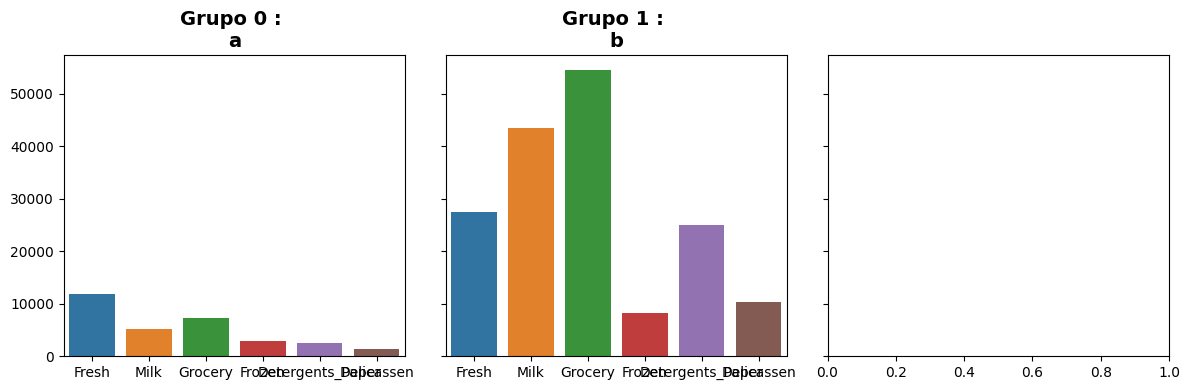

In [31]:
g = pd.DataFrame( df.groupby('Cluster').mean() ).reset_index()

fig, ax = plt.subplots(1,3,figsize=(12,4),sharey=True)

nomes = ['a','b','c']

for i in range(len(g)):
  sns.barplot(data=g[g.Cluster==i].drop(columns='Cluster'),ax=ax[i])
  ax[i].set_title('Grupo ' + str(i) + ' : \n' + nomes[i], fontsize=14, weight='bold')

plt.tight_layout()
plt.show()



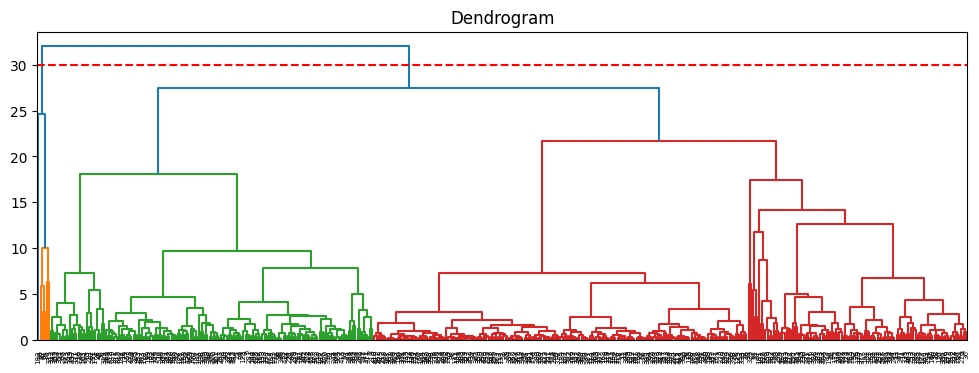

In [28]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

f, ax = plt.subplots(1,1,figsize=(12,4),sharey=True)

ax.set_title("Dendrogram")
plt.xticks(rotation=90)

dendrogram = shc.dendrogram(shc.linkage(X, method='ward'))
ax.axhline(y=30, color='r', linestyle='--')

plt.show()

Observando o dendograma você pode notar que 2 clusters não parece uma divisão interessante dos dados e o diagrama ainda sugere que 3 clusters teriam mais sentido para nossos dados.

Vamos então refazer a clusterização para 3 clusters.

In [32]:
clf = AgglomerativeClustering(n_clusters=3)

clf.fit(X)

# Resultados
labels = clf.labels_
print(labels)

[2 2 2 1 1 2 2 2 1 2 2 1 1 1 1 1 2 2 1 2 1 1 1 1 2 2 1 1 2 1 1 1 1 1 1 2 1
 2 2 1 1 1 2 2 2 2 2 0 2 2 1 1 1 2 1 1 2 2 1 2 2 0 2 2 1 2 2 1 1 1 1 1 1 1
 2 1 1 2 1 1 1 2 2 1 2 0 0 1 1 1 1 1 2 1 2 1 2 1 1 1 2 2 2 1 1 1 2 2 2 2 1
 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 2 2 1 1
 1 1 1 1 1 2 1 2 2 1 2 2 2 1 1 2 2 2 2 1 1 1 2 2 2 2 1 2 1 1 2 1 1 1 2 0 1
 2 1 2 2 2 1 1 1 2 1 1 1 2 1 1 2 2 2 1 1 2 1 2 2 2 1 2 1 2 2 2 2 1 2 1 1 2
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 2 1 1 2 1 1 2 1 2 1 1
 1 1 1 1 1 2 2 2 1 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 1 2 2 1 1 2 2 2 2 2 2 1 1 2 1 1 2 1 1 2 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 2 1
 0 1 1 1 1 1 1 2 2 2 2 1 2 2 1 1 2 1 2 1 2 1 1 1 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 2 1 1 1 2 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 2 2 2 1 2 2 1 1 2 2 2 2 1 2 1 1 2 2 1 2 1 1 1 2 1 1 1 2 1 1 2 1 1]


In [33]:
df['Cluster'] = labels
df.head()

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen  Cluster
0  12669  9656     7561     214              2674        1338        2
1   7057  9810     9568    1762              3293        1776        2
2   6353  8808     7684    2405              3516        7844        2
3  13265  1196     4221    6404               507        1788        1
4  22615  5410     7198    3915              1777        5185        1

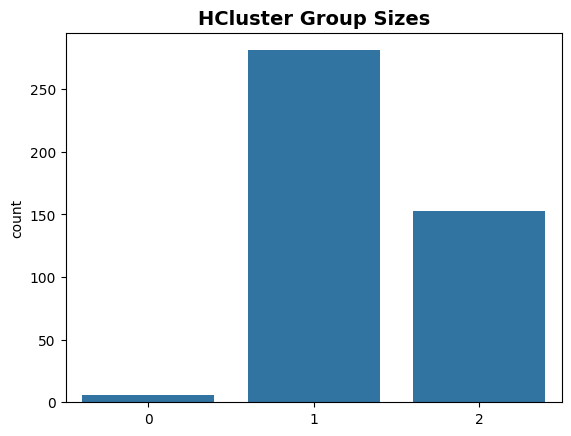

In [34]:
# Análise: Tamanho dos Clusters
sns.countplot(x=labels)
plt.title('HCluster Group Sizes', fontsize=14, weight='bold')
plt.show()

In [35]:
df.groupby('Cluster').mean()

Fresh          Milk       Grocery       Frozen  \
Cluster                                                          
0        27477.000000  43542.166667  54588.500000  8285.666667   
1        15048.932384   3017.298932   3791.761566  3837.316726   
2         5794.241830   9419.888889  13761.738562  1461.764706   

         Detergents_Paper    Delicassen  
Cluster                                  
0            25018.333333  10247.833333  
1              758.007117   1309.900356  
2             5913.379085   1577.607843

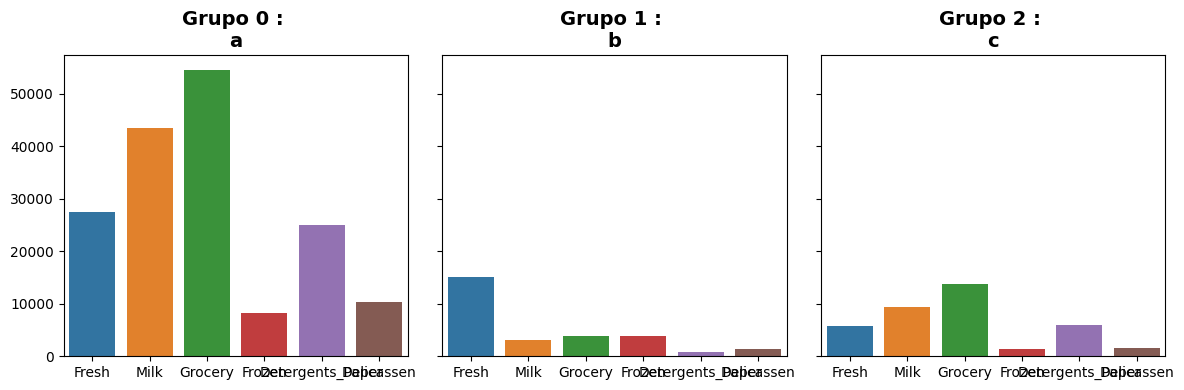

In [36]:
g = pd.DataFrame( df.groupby('Cluster').mean() ).reset_index()

fig, ax = plt.subplots(1,3,figsize=(12,4),sharey=True)

nomes = ['a','b','c']

for i in range(len(g)):
  sns.barplot(data=g[g.Cluster==i].drop(columns='Cluster'),ax=ax[i])
  ax[i].set_title('Grupo ' + str(i) + ' : \n' + nomes[i], fontsize=14, weight='bold')

plt.tight_layout()
plt.show()



### PCA (Principal Component Analysis), 

In [61]:
from IPython.display import IFrame

url = "https://setosa.io/ev/principal-component-analysis/"

iframe = IFrame(src=url, width="100%", height=300)
iframe

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mticker
import seaborn as sns

#### PCA no Python Using `scikit-learn` PCA

In [63]:
df = sns.load_dataset('iris')
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [65]:
# Variância dos dados originais
print('\nVariância de cada atributo:\n', np.var(df.drop('species',axis=1), axis=0).values)
print('\nVariância acumulada:\n', np.var(df.drop('species',axis=1), axis=0).values / np.var(df.drop('species',axis=1), axis=0).values.sum())



Variância de cada atributo:
 [0.68112222 0.18871289 3.09550267 0.57713289]

Variância acumulada:
 [0.14994532 0.04154411 0.68145793 0.12705264]


##### transformação de dados

In [66]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df.drop('species', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

print('\nNovos valores:\n', X_pca[0:5,:], '\n(...)')
print('\nVariância de cada Componente (os valores transformados):\n', pca.explained_variance_)
print('\nVariância acumulada:\n', pca.explained_variance_ratio_)



Novos valores:
 [[-2.26470281  0.4800266   0.12770602 -0.0241682 ]
 [-2.08096115 -0.67413356  0.23460885 -0.10300677]
 [-2.36422905 -0.34190802 -0.04420148 -0.02837705]
 [-2.29938422 -0.59739451 -0.09129011  0.06595556]
 [-2.38984217  0.64683538 -0.0157382   0.03592281]] 
(...)

Variância de cada Componente (os valores transformados):
 [2.93808505 0.9201649  0.14774182 0.02085386]

Variância acumulada:
 [0.72962445 0.22850762 0.03668922 0.00517871]


##### PCA Clustering


In [67]:
from sklearn.cluster import KMeans

X = df.drop('species', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2) # pca = PCA(0.8)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=3, random_state=1,n_init="auto").fit(X_pca)

clusters = pd.DataFrame()
clusters['kmeans_pca'] = kmeans.labels_
display(clusters.iloc[np.random.choice(clusters.index,5)])
display(clusters.groupby('kmeans_pca').kmeans_pca.count())

kmeans_pca
74            0
69            0
1             1
119           0
118           2

kmeans_pca
0    46
1    49
2    55
Name: kmeans_pca, dtype: int64

#### Comparando com Clustering sem PCA

O quando que essa clusterização com apenas 2 componentes se assemelha a clusterização empregando todos os atributos originais?

In [68]:
kmeans = KMeans(n_clusters=3, random_state=1,n_init="auto").fit(X_scaled)

clusters['kmeans_original'] = kmeans.labels_
display(clusters.iloc[np.random.choice(clusters.index,5)])
display(clusters.groupby('kmeans_original').kmeans_pca.count())

kmeans_pca  kmeans_original
134           0                0
28            1                1
58            2                2
43            1                1
27            1                1

kmeans_original
0    46
1    49
2    55
Name: kmeans_pca, dtype: int64

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(clusters['kmeans_original'],clusters['kmeans_pca']))
print('\nPercentual de coincidência:\n', accuracy_score(clusters['kmeans_original'],clusters['kmeans_pca']))


[[46  0  0]
 [ 0 49  0]
 [ 0  0 55]]

Percentual de coincidência:
 1.0


#### Exemplo 2


Empregando apenas 2 componentes principais ou min 80%  da variância acumulada.

COM PCA

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df.drop(columns='species')
y = df.species

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=3)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=2) # pca = PCA(0.8)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

clf = LogisticRegression(max_iter=100)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

clf.score(X_test,y_test)

0.9111111111111111

SEM PCA


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df.drop(columns='species')
y = df.species

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=3)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = LogisticRegression(max_iter=100)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

clf.score(X_test,y_test)

### Numero ideal de Clusters - Metodos

#### Método do cotovelo

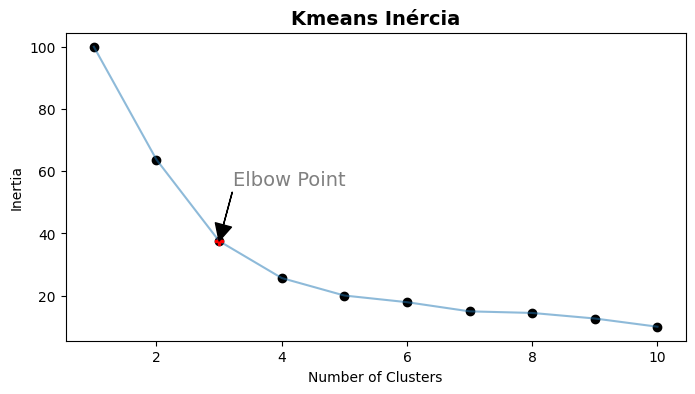

In [11]:
def inercia(X=X, kmin=1, kmax=10):
  inertia = []
  for n in range(kmin , kmax+1):
      clf = KMeans(n_clusters = n , random_state= 1984)
      clf.fit(X)
      inertia.append(clf.inertia_)

  plt.figure(figsize = (8, 4))
  plt.plot(np.arange(1 , 11) , inertia , 'ko')
  plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
  plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
  plt.title('Kmeans Inércia', fontsize=14, weight='bold')
  return inertia

inertia = inercia(X,1,10)
# adicionado depois... ;-)
plt.plot(3 , inertia[2] , 'P', alpha = 1, color = 'red')
plt.annotate('Elbow Point', (3 , inertia[2]),
            xytext=(10, 40), fontsize=14,
            textcoords='offset points',
            color='grey',arrowprops=dict(facecolor='black',width=0.1))

plt.show()

Essa é uma técnica visual e aproximada. De qualquer modo podemos agora reproduzir a clusterização com o número ideal de cluster, $k=3$.

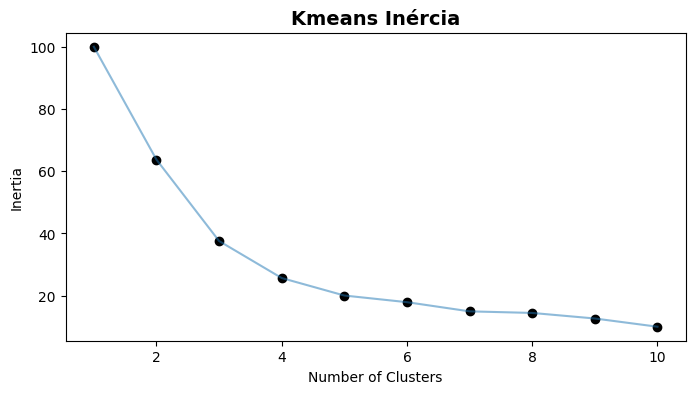

In [15]:
def inercia(X=X, kmin=1, kmax=10):
  inertia = []
  for n in range(kmin , kmax+1):
      clf = KMeans(n_clusters = n , random_state= 1984)
      clf.fit(X)
      inertia.append(clf.inertia_)

  plt.figure(figsize = (8, 4))
  plt.plot(np.arange(1 , 11) , inertia , 'ko')
  plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
  plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
  plt.title('Kmeans Inércia', fontsize=14, weight='bold')
  return inertia

inertia = inercia(X,1,10)

plt.show()

#### Método da Silhueta

In [12]:
from sklearn import metrics

for n_clusters in range(2,11):
  clf = KMeans(n_clusters = n_clusters , random_state= 1984)
  clf.fit(X)
  labels = clf.labels_
  print('Silhueta média para', n_clusters , 'clusters: ', np.round( metrics.silhouette_score(X, labels, metric='euclidean'),3))

Silhueta média para 2 clusters:  0.339
Silhueta média para 3 clusters:  0.372
Silhueta média para 4 clusters:  0.385
Silhueta média para 5 clusters:  0.376
Silhueta média para 6 clusters:  0.366
Silhueta média para 7 clusters:  0.353
Silhueta média para 8 clusters:  0.322
Silhueta média para 9 clusters:  0.3
Silhueta média para 10 clusters:  0.349


Maior - > melhor

# Timeseries

## Introdução Series Temporais

In [41]:
import pandas as pd

path_data = 'https://github.com/Introducao-Series-Temporais-em-Python/Book/raw/main/Data/'
df = pd.read_csv(path_data + 'co2.csv')
df.drop(columns='time',inplace=True)
df.head()

Date     CO2
0  1981-05-01  342.74
1  1981-06-01  342.08
2  1981-07-01  340.32
3  1981-08-01  338.26
4  1981-09-01  336.52

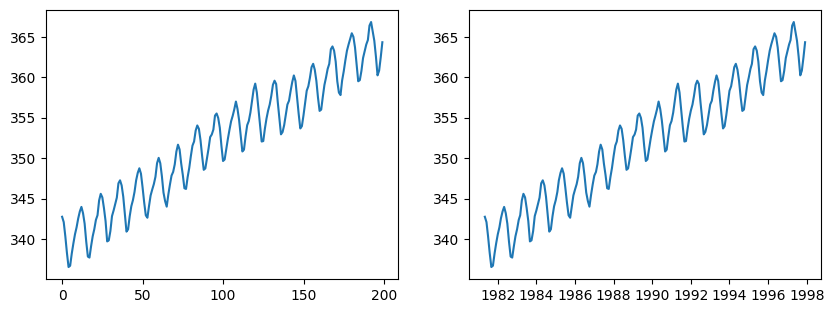

In [ ]:
plt.figure(figsize=(10,3.5))

plt.subplot(1,2,1)
plt.plot(df.CO2)

plt.subplot(1,2,2)
plt.plot(pd.to_datetime(df.Date),df.CO2)

plt.show()



Jeito correto

In [44]:
df.index = pd.to_datetime(df.Date)
df.drop(columns='Date',inplace=True)
df.head()


CO2
Date              
1981-05-01  342.74
1981-06-01  342.08
1981-07-01  340.32
1981-08-01  338.26
1981-09-01  336.52

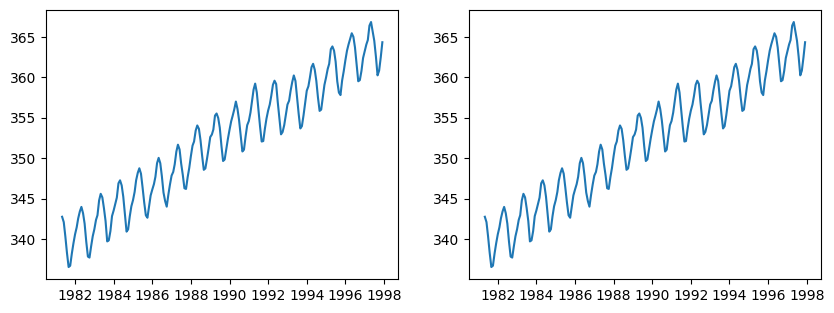

In [ ]:
plt.figure(figsize=(10,3.5))

plt.subplot(1,2,1)
plt.plot(df.CO2)

plt.subplot(1,2,2)
plt.plot(df.index,df.CO2)

plt.show()

## Time Series Forecast




**Instead**

* Linear **WRONG**

$$CO2 = a_0 + a_1 time$$

* non-Linear **WRONG**

$$CO2 = f(time)$$
, where $f$ is some Machine Learning fuction

**Auto Regression**

$$CO2_t = a_0 + a_1 CO2_{t-1}$$

or, in more general way

$$CO2_t = a_0 + a_1 CO2_{t-1} + a_2 CO2_{t-2} + ... + a_n CO2_{t-n} + \epsilon$$



In [38]:
df['time'] = np.array(range(len(df)))
df.head()

Date     CO2  time
0  1981-05-01  342.74     0
1  1981-06-01  342.08     1
2  1981-07-01  340.32     2
3  1981-08-01  338.26     3
4  1981-09-01  336.52     4

RMSE: 2.2515026895488512


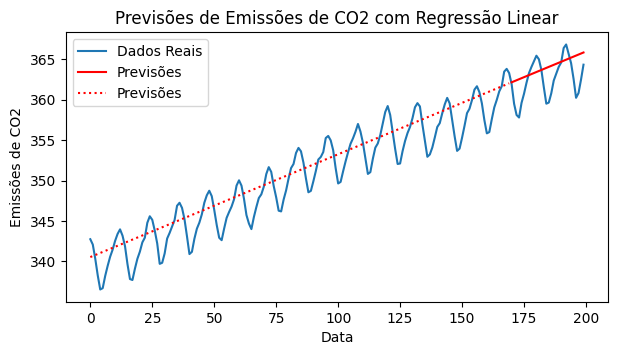

In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

# X = df.index
X = df[['time']]
y = df['CO2']

model = LinearRegression()
#model = KNeighborsRegressor(3)
#model = DecisionTreeRegressor(max_depth=None)

model.fit(X.iloc[0:-30], y.iloc[0:-30])

y_pred = model.predict(X.iloc[-30::])

# Calcular o erro médio quadrático (RMSE)
rmse = np.sqrt(mean_squared_error(y.iloc[-30::], y_pred))
print(f'RMSE: {rmse}')

# Plotar os resultados
plt.figure(figsize=(7, 3.5))
plt.plot(df.index, df['CO2'], label='Dados Reais')
plt.plot(df.iloc[-30::].index, y_pred+1, label='Previsões', color='red')
plt.plot(df.iloc[0:-30].index, model.predict(X.iloc[0:-30])+1,'r:', label='Previsões')
plt.xlabel('Data')
plt.ylabel('Emissões de CO2')
plt.title('Previsões de Emissões de CO2 com Regressão Linear')
plt.legend()
plt.show()


In [45]:
df[['CO2-1']] = df[['CO2']].shift(1)
df.head( )

CO2   CO2-1
Date                      
1981-05-01  342.74     NaN
1981-06-01  342.08  342.74
1981-07-01  340.32  342.08
1981-08-01  338.26  340.32
1981-09-01  336.52  338.26

In [46]:
df.dropna(inplace=True)
df.head()

CO2   CO2-1
Date                      
1981-06-01  342.08  342.74
1981-07-01  340.32  342.08
1981-08-01  338.26  340.32
1981-09-01  336.52  338.26
1981-10-01  336.68  336.52

RMSE: 1.3754518601864685


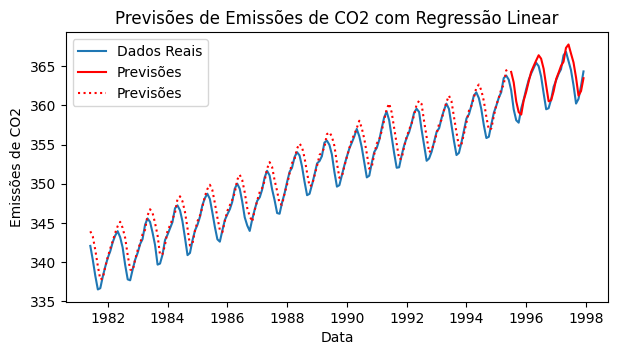

In [47]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

# X = df.index
X = df[['CO2-1']]
y = df['CO2']

model = LinearRegression()
#model = KNeighborsRegressor(3)
#model = DecisionTreeRegressor(max_depth=None)

model.fit(X.iloc[0:-30], y.iloc[0:-30])

y_pred = model.predict(X.iloc[-30::])

# Calcular o erro médio quadrático (RMSE)
rmse = np.sqrt(mean_squared_error(y.iloc[-30::], y_pred))
print(f'RMSE: {rmse}')

# Plotar os resultados
plt.figure(figsize=(7, 3.5))
plt.plot(df.index, df['CO2'], label='Dados Reais')
plt.plot(df.iloc[-30::].index, y_pred+1, label='Previsões', color='red')
plt.plot(df.iloc[0:-30].index, model.predict(X.iloc[0:-30])+1,'r:', label='Previsões')
plt.xlabel('Data')
plt.ylabel('Emissões de CO2')
plt.title('Previsões de Emissões de CO2 com Regressão Linear')
plt.legend()
plt.show()


## Series Temporais definição

De acordo com o seu objetivo você pode estar interessado em diferentes tarefas  aplicadas a uma série temporal:

1. Fazer previsões de valores futuros
1. Entender o mecanismo gerador da série
1. Descrever e comparar o comportamento da série
1. Procurar periodicidades e padrões relevantes
1. Identificar anomalias
1. Simular a série de dados

e, certamente, fazer previsões de valores futuros desempenha um papel bastante importante. Em todos os casos busca-se criar um modelo que se pretende útil para análise e aqui nos concentraremos unicamente em modelos auto-regressivos integrados de médias móveis (ARIMA) e de aprendizado de máquina supervisionado para previsões de valores futuros. Ambos são *modelos paramétricos* (possuem um número finito de parâmetros) e modelam as séries no *domínio do tempo* (diferentemente de modelos que empregam a frequência ou o espaço de estados), e estão entre os modelos mais amplamente aplicados na economia, finanças, engenharias e outras áreas.



## Decomposição de séries temporais



A ideia de construir um modelo é a de criarmos uma simplificação útil dos dados e no caso de séries temporais o modelo de decomposição é o procedimento clássico.

Em geral decompomos uma série temporal em componentes onde cada um busca modelar um tipo de padrão ou comportamento da série:

* **Tendência**
* **Sazonalidade**
* **Resíduos**
* **Sazonalidade**


<br>
<br>
<br>

* A **tendência** apresenta o comportamento da série no longo prazo, o aumento ou diminuição dos valores da série no longo prazo, como o crescimento da temperatura global ano a ano. 


* A componente **sazonalidade** apresenta o padrão sazonal da série, como mudanças que ocorrem com alguma periodicidade ao longo do tempo. É o caso dos acréscimos e decréscimos de temperatura que ocorrem ao longo das estações do ano, independentemente da elevação das temperaturas no longo prazo.


* Por último, os **resíduos**, apresentam o comportamento  estocástica, ou *aleatório* da série, e que não sabemos explicar. Correspondem, por exemplo, às diferenças de temperatura entre dois dias consecutivos da mesma estação causadas por inúmeros fatores como a maior presença de nuvens ou de raios solares naqueles dias. Essa componente também pode ser denominada de *erro aleatório* ou *ruído branco*.

* Vários desses comportamentos podem ser observados nas séries de Figura 1, como a tendência linear crescente do consumo de gás para geração de energia, as sazonalidades anais da venda de anti-histamínicos etc.

* Em geral, a tendência inclui uma outra componente denominada **ciclo**, mas que por simplicidade denominamos unicamente de tendência. Ciclos e mudanças sazonais são comportamentos bem diferentes nas séries temporais. A sazonalidade é um comportamento recorrente que se repete a intervalos fixos, regulares (a maior temperatura em certas estações do ano, o maior número de visitas em um site de entretenimento aos finais de semana). **Já os ciclos são comportamentos recorrentes mas que ocorrem a intervalos não regulares. Vulcões e terremotos, por exemplo, têm um comportamento recorrente, mas não sabemos quando irão ocorrer, e uma série que represente as temperaturas ou o tremor em torno da cratera do Vulcão Eyjafjallajökull apresentará comportamentos repetitivos,** mas que não são sazonais. O mesmo ocorre com os ciclos econômicos que alternam recessão e crescimento, e não sabemos quando irá ocorrer a próxima crise ou o estouro de uma *bolha* do mercado. Nas séries de Figura 1, por exemplo, podemos observar alguns 'ciclos' de séries financeiras (GDP e SP500) e das ondas de variantes da pandemia de COVID.





### Decomposição da série temporal em python

O principal pacote para modelos estatísticos de séries de dados em `Python` é o `statsmodel`, e a função `seasonal_decompose()` permite decompor uma série em suas componentes de tendência, sazonalidade e resíduos.

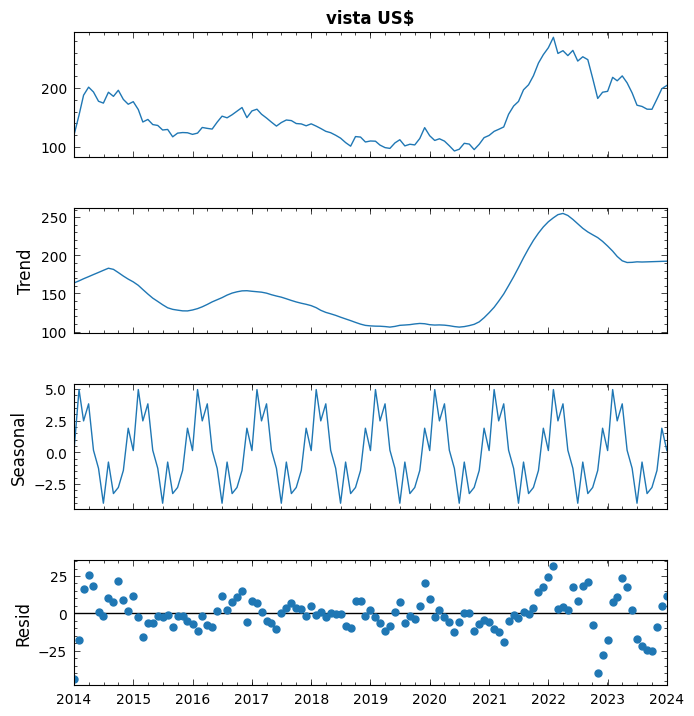

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['vista US$'], model='additive', extrapolate_trend=1)

fig = result.plot()
fig.set_size_inches((7, 8))
plt.show()



In [ ]:
df_compose = pd.DataFrame()

df_compose['trend'] = result.trend
df_compose['seasonal'] = result.seasonal
df_compose['resid'] = result.resid

df_compose['compose'] = df_compose.sum(axis=1)
df_compose.head()

trend  seasonal      resid  compose
Data                                                
2014-01-01  163.774583  0.142035 -44.036618   119.88
2014-02-01  166.537917  4.960345 -17.538262   153.96
2014-03-01  169.301250  2.486304  16.002446   187.79
2014-04-01  172.064583  3.833470  25.551946   201.45
2014-05-01  174.827917  0.168887  18.223196   193.22

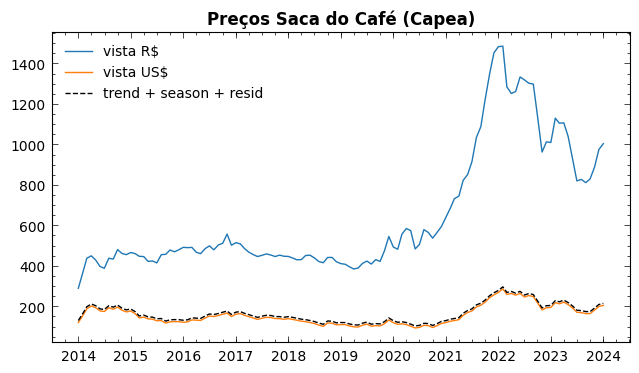

In [ ]:
plt.plot(df,label=['vista R$','vista US$'])
plt.plot(df_compose['compose']+10,color='k',linestyle='dashed',label='trend + season + resid')

plt.title('Preços Saca do Café (Capea)')
plt.legend()
plt.show()

## **Séries temporais em Python - exemplo completo**

### importações

In [ ]:
# basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Analise inicial dos dados

In [79]:
course_path = 'https://github.com/Rogerio-mack/SBSI_2024_ts_short_course/raw/main'


In [80]:
df = pd.read_csv(course_path + '/data/capea-consulta-cafe.csv')
df.head()

Data  vista R$  vista US$
0  01/2014    288.98     119.88
1  02/2014    366.32     153.96
2  03/2014    437.24     187.79
3  04/2014    449.45     201.45
4  05/2014    429.28     193.22

In [ ]:
df[ df['vista R$'] > 1400 ][ ['Data', 'vista R$'] ]

Data  vista R$
95  12/2021   1452.15
96  01/2022   1482.59
97  02/2022   1485.35

In [ ]:
df.dtypes

Data          object
vista R$     float64
vista US$    float64
dtype: object

                        cuidado  # seleção errônea dos dados com o atributo Data no formato de caracteres (object)


In [ ]:
# seleção errônea dos dados com o atributo Data no formato de caracteres (object)
df[ df['Data'] > '10/2023' ].head()

Data  vista R$  vista US$
10  11/2014    460.96     180.61
11  12/2014    455.20     172.39
22  11/2015    469.39     124.29
23  12/2015    479.32     123.94
34  11/2016    556.74     166.83

                # seleção correta dos dados com o atributo Data no formato de datetime


In [81]:
# seleção correta dos dados com o atributo Data no formato de datetime
df.Data = pd.to_datetime(df.Data)
df[ df['Data'] > '10/2023' ].head()

/tmp/ipykernel_20827/4211867004.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.Data = pd.to_datetime(df.Data)


Data  vista R$  vista US$
118 2023-11-01    888.00     181.31
119 2023-12-01    974.46     198.90
120 2024-01-01   1003.74     204.34

In [ ]:
df.Data = pd.to_datetime(df.Data)
df[ df['Data'].dt.year > 2023 ].head()

Data  vista R$  vista US$
120 2024-01-01   1003.74     204.34

### Colocando o index dos dados em formato de data 

Em `Python`, muitas funções úteis para a manipulação de séries temporais como resample, gráficos e uso de outros pacotes, requerem que o atributo de tempo da série temporal esteja representado no índice dos dados.

In [82]:
df.index = pd.to_datetime(df.Data)
df = df.drop(columns='Data')
df.head()

vista R$  vista US$
Data                           
2014-01-01    288.98     119.88
2014-02-01    366.32     153.96
2014-03-01    437.24     187.79
2014-04-01    449.45     201.45
2014-05-01    429.28     193.22

#### Grupby por ano

In [ ]:
# resample dos dados por ano
df_year = df.resample('Y').mean()
df_year.head()

vista R$   vista US$
Data                              
2014-12-31  418.572500  177.984167
2015-12-31  451.494167  137.497500
2016-12-31  494.522500  142.853333
2017-12-31  465.690833  146.050833
2018-12-31  435.646667  120.087500

### Gráficos


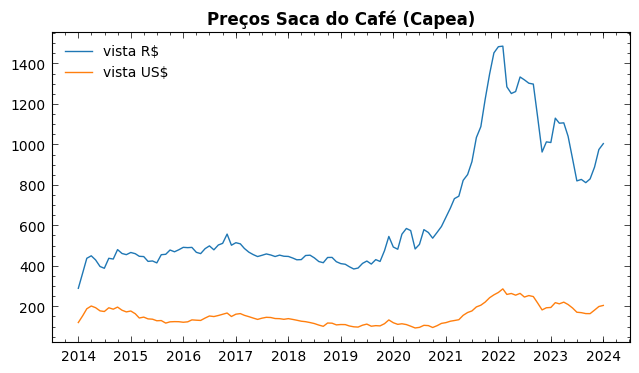

In [ ]:
plt.plot(df,label=['vista R$','vista US$'])

plt.title('Preços Saca do Café (Capea)')
plt.legend()
plt.show()

### Decompondo da série temporal

O principal pacote para modelos estatísticos de séries de dados em `Python` é o `statsmodel`, e a função `seasonal_decompose()` permite decompor uma série em suas componentes de tendência, sazonalidade e resíduos.

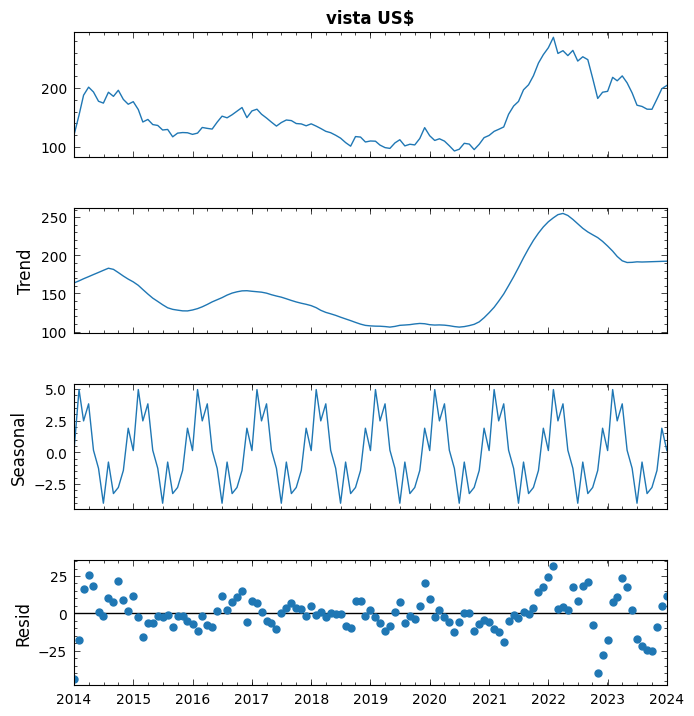

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['vista US$'], model='additive', extrapolate_trend=1)

fig = result.plot()
fig.set_size_inches((7, 8))
plt.show()



In [ ]:
df_compose = pd.DataFrame()

df_compose['trend'] = result.trend
df_compose['seasonal'] = result.seasonal
df_compose['resid'] = result.resid

df_compose['compose'] = df_compose.sum(axis=1)
df_compose.head()

trend  seasonal      resid  compose
Data                                                
2014-01-01  163.774583  0.142035 -44.036618   119.88
2014-02-01  166.537917  4.960345 -17.538262   153.96
2014-03-01  169.301250  2.486304  16.002446   187.79
2014-04-01  172.064583  3.833470  25.551946   201.45
2014-05-01  174.827917  0.168887  18.223196   193.22

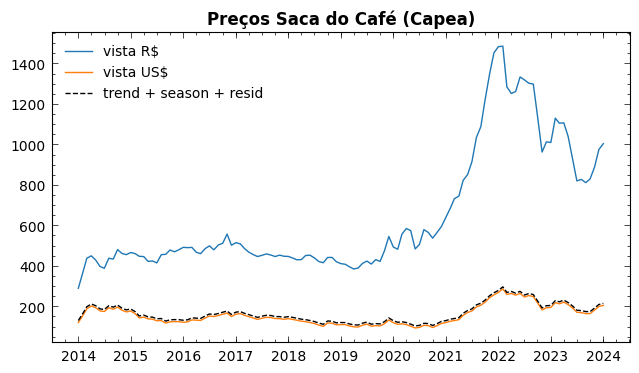

In [ ]:
plt.plot(df,label=['vista R$','vista US$'])
plt.plot(df_compose['compose']+10,color='k',linestyle='dashed',label='trend + season + resid')

plt.title('Preços Saca do Café (Capea)')
plt.legend()
plt.show()

## Séries aditivas e multiplicativas

 A depender da natureza da série as componentes de tendência, sazonalidade e resíduo podem ser combinadas de forma aditiva ou multiplicativa, isto é:

$$ Y_t = T_t + S_t + R_t $$

para modelos aditivos, ou:

$$ Y_t = T_t \times S_t \times R_t $$

para modelos multiplicativos, sendo $Y_t$ a série observada e $T_t, S_t, R_t$ respectivamente as componentes de tendência, sazonalidade e resíduo.

Idealmente você pode ter em mente que séries aditivas apresentam valores que, embora apresentem variações, têm uma variação limitada ao longo do tempo. Já séries multiplicativas, em geral, apresentam um comportamento explosivo, ou exponencial. De qualquer modo, lembre-se que os modelos são simplificações que buscam ser úteis, e uma série, por exemplo a atividade solar a cada mês, não tem qualquer obrigação de se comportar de forma aditiva ou multiplicativa, e nem sempre é muito simples identificar se uma série é aditiva ou multiplicativa.



##### ignora

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

def ADF(df,verbose=False):
  result = adfuller(df)
  if verbose:
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

    if result[1] < 0.05:
      print('Série é ADF estacionária')
    else:
      print('Série é não ADF estacionária')

  return result

In [ ]:
#@markdown `PLOT`
def PLOT(df,ADF_result):

  fig, ax = plt.subplots(1,2,figsize=(12,3.5))
  ax[0].plot(df,label='Série',alpha=0.5,lw=1)
  # plt.setp(ax[0].get_xticklabels(), fontsize=9)
  ax[0].tick_params(axis='x', labelsize=9)
  ax[0].plot(df.rolling(ADF_result[2]).mean(),label='Média Móvel (' + str(ADF_result[2]) + ')',c='k')

  if ADF_result[1] < 0.05:
    ax[0].set_title('Série ADF estacionária, p-value = ' + str(np.round(ADF_result[1],4)))
  else:
    ax[0].set_title('Série não ADF estacionária, p-value = ' + str(np.round(ADF_result[1],4)))

  ax[0].legend(loc='upper left')

  grouped_means = [df['values'][i:i+ADF_result[2]].mean() for i in range(0, len(df), ADF_result[2])]
  grouped_var = [df['values'][i:i+ADF_result[2]].var() for i in range(0, len(df), ADF_result[2])]

  ax[1].plot(range(len(grouped_means)), grouped_means, label='Médias',alpha=0.8)
  ax[1].plot(range(len(grouped_var)), grouped_var, label='Variância',alpha=0.8, linestyle='dashed')

  ax[1].set_title('Médias e variância ao longo do tempo')
  ax[1].legend(loc='upper left')

  plt.tight_layout()
  plt.show()

  return





## 2.4. Estacionariedade  

Decompor uma série já traz informações bastante úteis, como a tendência de seus valores futuros, padrões sazonais e seu grau de incerteza. Mas na maior parte dos casos estamos interessados em fazer previsões mais assertivas dos valores futuros.

Para isso, a maior parte dos modelos assume que a série que se deseja prever é uma série *estacionária*. Uma série  estacionária, é uma série em que as estatísticas dos dados, isto é, média, variância e covariância *não mudam ao longo do tempo*. A *estacionariedade no sentido amplo* significaria a ausência completa de tendência e sazonalidade da série. Mas, em geral, é suficiente e mais comum a *estacionariedade no sentido restrito*, podendo haver mudanças das estatísticas em algum momento (como as sazonalidades) mas não *ao longo do tempo*.



In [ ]:
no_stacionary_avg = pd.read_csv(course_path + '/data/no_stacionary_avg.csv',index_col=0,parse_dates=True)
no_stacionary_var = pd.read_csv(course_path + '/data/no_stacionary_var.csv',index_col=0,parse_dates=True)
stacionary = pd.read_csv(course_path + '/data/stacionary.csv',index_col=0,parse_dates=True)


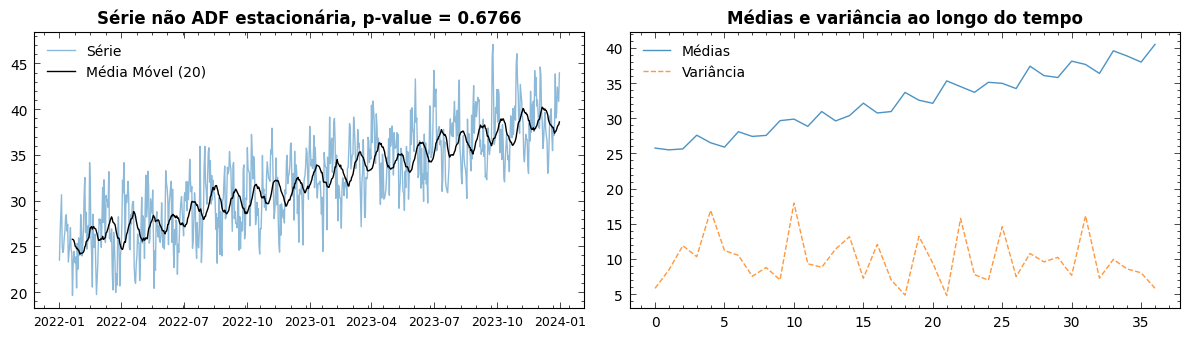

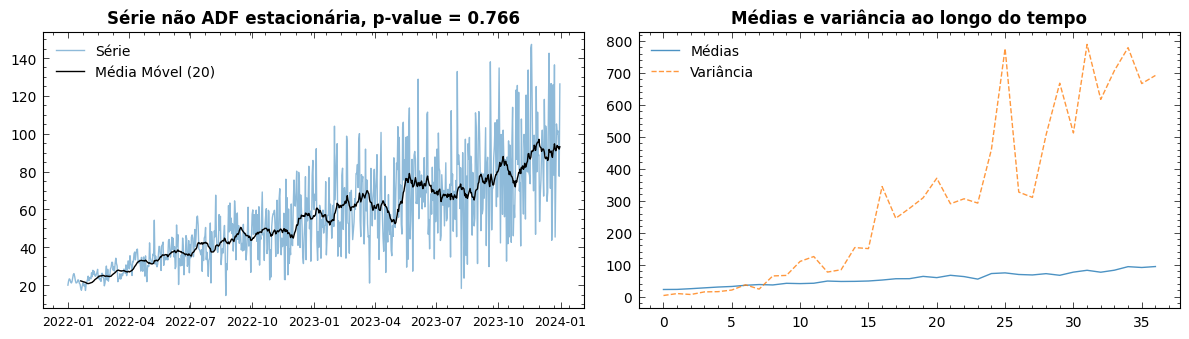

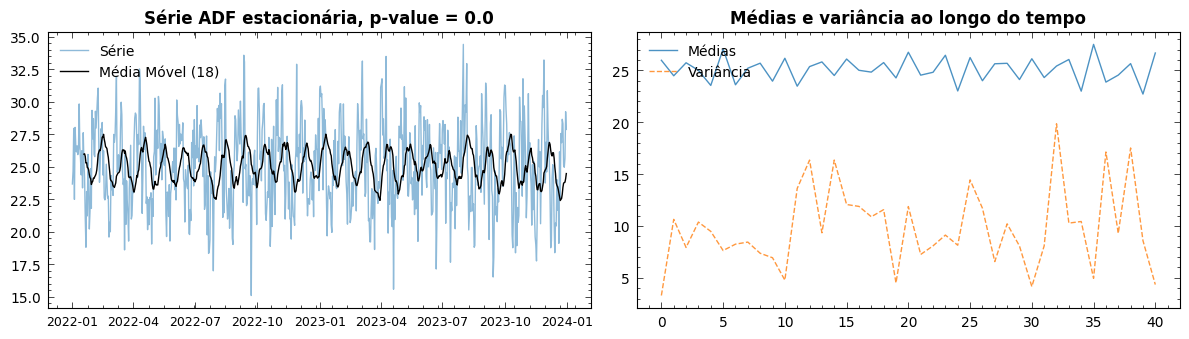

In [ ]:
PLOT(no_stacionary_avg, ADF(no_stacionary_avg))
PLOT(no_stacionary_var, ADF(no_stacionary_var))
PLOT(stacionary, ADF(stacionary))

Há vários testes estatísticos para verificar a estacionariedade de uma série temporal, mas os testes mais comuns são o teste **Augmented Dickey Fuller (“ADF”)** e o teste **Kwiatkowski-Phillips-Schmidt-Shin (“KPSS”)** e que, basicamente, verificam a presença de tendência na série e  entendimento do domínio e a análise exploratória dos dados são essenciais para uma interpretação adequada desses testes. Os gráficos anteriores ilustram diferentes casos de  estacionariedade e não estacionariedade com os respectivos p-values do teste ADF.

Tanto no ADF como no KPSS teste, a hipótese nula (estacionariedade) é rejeitada para $\text{p-value} > 0.05$. Assim, **para $\text{p-value} < 0.05$, diremos que a série é estacionária**.

## 2.5. Sazonalidade

A inspeção visual das séries desempenha um papel fundamental na identificação de sazonalidades, como também da estacionariedade apesar dos testes disponíveis. Gráficos de agrupamentos com os valores médios por dia, mês etc. são bastantes empregados e constituem a base de muitos modelos de sazonalidade.

In [ ]:
# Criando uma série de periodicidade anual
date_range = pd.date_range(start='2021-01-01', periods=4*12, freq='M')
seasonal_pattern = np.sin(np.linspace(0, 2*np.pi, 12)) # Repetindo o padrão mensal (de janeiro a dezembro) por 3 anos
values = np.tile(seasonal_pattern, 4) # Repetindo o padrão sazonal para os 4 anos
values = 10*values + 5*np.random.sample(len(values))

time_series = pd.DataFrame({'Value': values},index=date_range)

In [ ]:
# agregando os valores
group_month = pd.DataFrame(time_series.groupby([time_series.index.year,time_series.index.month]).mean()).reset_index()
group_month.columns = ['year','month','values']


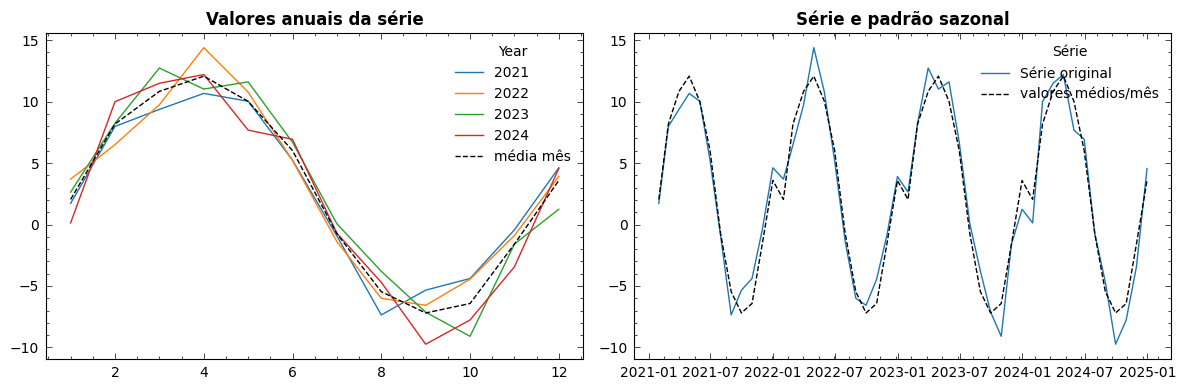

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

for y in group_month.year.unique():
 ax[0].plot(group_month[ group_month.year == y ].month,group_month[ group_month.year == y ]['values'],label=y)

ax[0].plot(time_series.index.month.unique(),time_series.groupby([time_series.index.month]).mean(),'k--',label='média mês')
ax[0].set_title('Valores anuais da série')
ax[0].legend(title='Year',loc='upper right')

ax[1].plot(time_series,label='Série original')
ax[1].plot(time_series.index,np.tile(time_series.groupby([time_series.index.month]).mean().values.flatten(),4),'k--',label='valores médios/mês')
ax[1].set_title('Série e padrão sazonal')
ax[1].legend(title='Série',loc='upper right')

plt.tight_layout()
plt.show()

### 2.5.1. Peridiograma

Apesar da importância e predominância da inspeção visual, o **peridiograma** pode ser uma ferramenta bastante útil e mais adiante introduziremos os gráficos autocorrelação que também nos ajudam a identificar sazonalidades.

O peridiograma apresenta a distribuição das frequências em um sinal ao longo do tempo e as frequências mais presentes podem ser empregadas para identificar as sazonalidades presentes na série.

$$ P_i = \frac{\text{Total de Períodos}}{freq_i} $$

onde, $P_i$ é a periodicidade da frequência $freq_i$. Pode haver inúmeras frequências, mas podemos nos limitar as mais predominantes (1, 2 ou 3 mais presentes).

frequencies  spectrum    periods
24          24.0  2.960242  30.416667
104        104.0  1.515986   7.019231
25          25.0  0.723724  29.200000
105        105.0  0.305413   6.952381
23          23.0  0.188924  31.739130

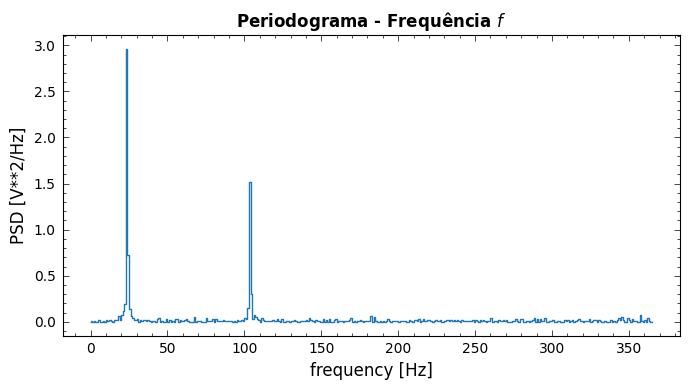

In [ ]:
from scipy import signal
fig, ax = plt.subplots(figsize=(7,4))

frequencies, spectrum = signal.periodogram(stacionary['values'],fs=len(stacionary))

ax.step(frequencies, spectrum)

ax.set_title('Periodograma - Frequência $f$')
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('PSD [V**2/Hz]')

dfft = pd.DataFrame()
dfft['frequencies'], dfft['spectrum'] = frequencies, spectrum
dfft['periods'] = len(stacionary) / dfft['frequencies']
display(dfft.sort_values('spectrum',ascending=False).head())

plt.tight_layout()
plt.show()



## 2.6. Diferenciação e Log: eliminando a tendência e sazonalidade

Um dos métodos mais simples para se reduzir a tendência de uma série temporal é construir uma nova série por **diferenciação**. Nesta nova série o valor no intervalo de tempo atual é calculado como a diferença entre o valor original e o valor no intervalo de tempo anterior.

$$ \Delta^1 y_t = y_t - y_{t-1} $$  
$$ \Delta^d y_t = y_t - y_{t-d} $$  


A diferenciação acima é de ordem 1 e diferenciações maiores podem ser aplicadas para, por exemplo, eliminar uma tendência polinominal. Para tendências exponenciais pode ser necessário aplicar, do mesmo modo, a transformação *logarítimica* da série (tornando-a linear) antes de se aplicar a diferenciação.

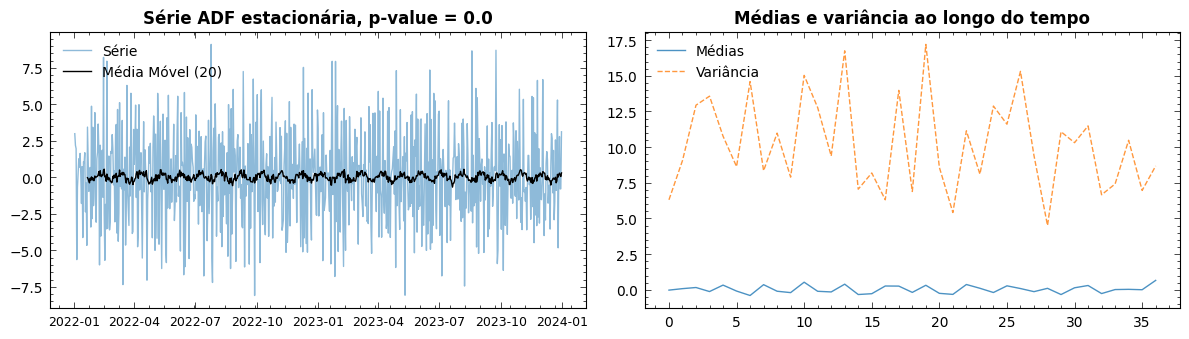

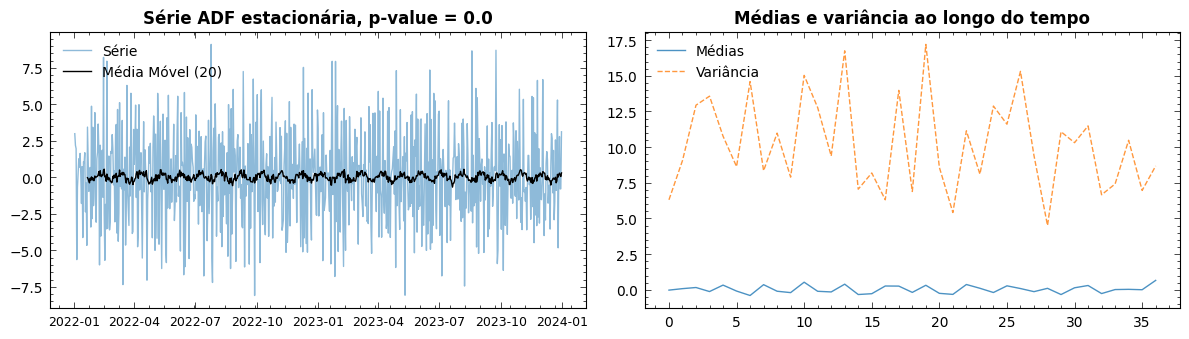

In [ ]:
PLOT(no_stacionary_avg.diff().dropna(), ADF(no_stacionary_avg.diff().dropna()))
PLOT(no_stacionary_avg.diff().dropna(), ADF(no_stacionary_avg.diff().dropna()))

In [ ]:
no_stacionary_varlog = no_stacionary_var.copy() + 100
no_stacionary_varlog['values'] = np.log(no_stacionary_varlog['values'])

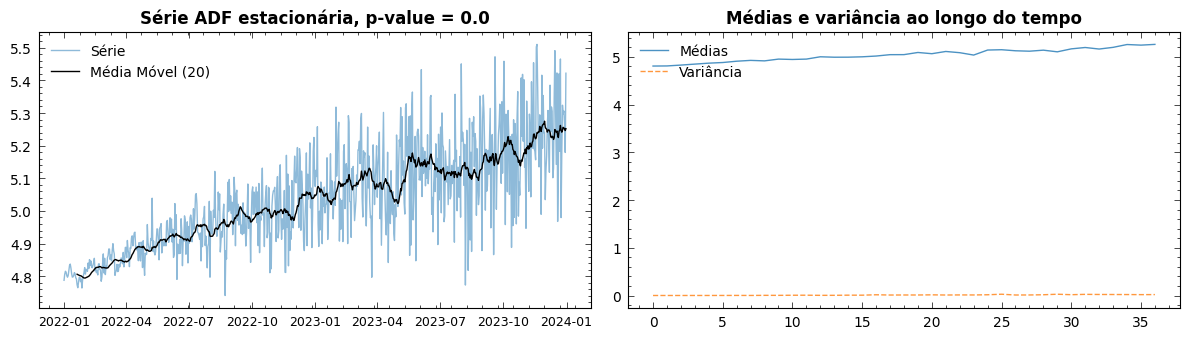

In [ ]:
PLOT(no_stacionary_varlog.dropna(), ADF(no_stacionary_varlog.diff().dropna()))

In [ ]:
#@markdown
# nota: para reconstrução da série original a partir da série diferenciada com cumsum()
no_stacionary_avg['y'] = no_stacionary_avg['values']
no_stacionary_avg['y.diff()'] = no_stacionary_avg['y'].diff()

no_stacionary_avg['y_cumsum()'] = no_stacionary_avg['y'].diff()
no_stacionary_avg.at['2022-01-01','y_cumsum()'] = no_stacionary_avg.iloc[0]['y']
no_stacionary_avg['y_cumsum()'] = no_stacionary_avg['y_cumsum()'].cumsum()

# no_stacionary_avg.head()

## 2.7. Resíduos

Os pressupostos do modelo ARIMA incluem a estacionariedade da série temporal (ou a estacionariedade por diferenciação), mas também a independência dos resíduos e a normalidade dos resíduos.

O termo resíduo é ser empregado para designar a diferença entre os valores reais e o ajuste obtido da série por algum modelo e consiste em uma componente *não explicada* série.

Essa diferença pode ser medida de diversas formas, mas ao final todas refletem as diferenças da série real $Y_t$ e os valores estimados $\hat Y_t$ que queremos minimizar. Por serem muito empregadas algumas dessas medidas recebem nomes especiais:

* Erro Médio Absoluto (*Mean Absolute Error*), $MAE = \frac{1}{n} \sum | Y_t - \hat Y_t |$

* Erro Médio Quadrático (*Mean Square Error*), $MSE = \frac{1}{n} \sum ( Y_t - \hat Y_t )^2$

* Raiz do Erro Médio Quadrático (*Root Mean Square Error*), $RMSE = \sqrt{ \frac{1}{n} \sum ( Y_t - \hat Y_t )^2 } $

* Erro Percentual Absoluto Médio (*Mean Absolute Percentage Error*), $MAPE = \frac{1}{n} \sum | \frac{Y_t - \hat Y_t}{Y_t} |$

Todas medidas que podem ser fácil e diretamente calculadas ou pode-se empregar algum pacote.



In [ ]:
import statsmodels.tools.eval_measures as eval_measures

def error_measures(y, y_pred):

    mae = np.mean(np.abs(y_pred - y))                  # MAE
    mse = np.mean((y_pred - y)**2)                     # MSE
    rmse = eval_measures.rmse(y, y_pred, axis=0)       # RMSE from statsmodels
    # rmse = np.mean((y_pred - y)**2)**.5              # RMSE
    mape = np.mean(np.abs(y_pred - y)/np.abs(y))       # MAPE

    metrics = {'MSE':mse, 'MAE': mae, 'RMSE':rmse, 'MAPE':mape}

    for key, value in metrics.items():
      print(f'{key}: \t {value:.4f}')

    return metrics

In [ ]:
result = seasonal_decompose(stacionary, model='additive')

non_NA = pd.merge(stacionary, result.trend, how='inner', left_index=True, right_index=True).dropna().index # exclui valores nulos das previsões

y = stacionary.loc[non_NA]['values']
y_pred = result.trend.loc[non_NA] + result.seasonal.loc[non_NA]

_ = error_measures(y,y_pred)

MSE: 	 3.6922
MAE: 	 1.5335
RMSE: 	 1.9215
MAPE: 	 0.0628


Mas além de buscar minimizar o erro, ou resíduos, queremos que seus valores sejam independentes, no sentido de não estarem correlacionados, e que apresentem uma distribuição normal.

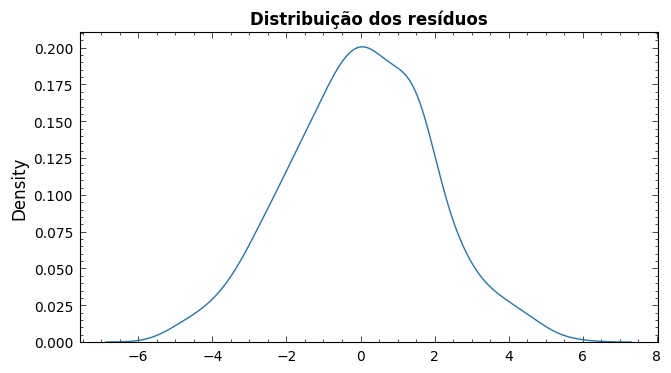

In [ ]:
sns.kdeplot(y - y_pred)

plt.title('Distribuição dos resíduos')
plt.show()

A normalidade dos resíduos pode ser verificada através de um gráfico de distribuição ou do tipo *qqplot*, o que é mais comum que o uso de testes de hipótese de normalidade. Para independência dos resíduos pode-se empregar um gráfico de autocorrelação dos resíduos. Veremos esse gráfico mais adiante como também uma função `plot_diagnostics()` do `statsmodels` que agrega todos esses gráficos para uma melhor análise dos resíduos.

## **Modelos autoregressivos** - na previsão de valores 

 A ideia principal dos modelos autoregressivos, incluindo o ARIMA, consiste em modelar a dependência serial dos dados, uma vez que, na maioria das séries, observa-se que os valores recentes estão correlacionados com seus valores passados e que a força dessa dependência diminui quando considerados valores mais distantes no tempo. Assim, é razoável pensar que o valor de amanhã das vendas de uma safra ou do volume de chuvas está correlacionado com os mesmos valores observados ontem, ou no dia anterior, e que essa correlação diminui conforme nos afastamos no tempo.



## 3.1. Modelos de regressão e autoregressão

Modelos de regressão se baseiam em variáveis independentes para prever a variável dependente, os modelos de autoregressão usam os próprios valores passados da variável dependente para fazer previsões futuras. Para séries temporais, em geral, faz mais sentido empregarmos a forma autoregressiva que empregar o tempo (que seria única variável independente em uma única série de dados). Entretanto, em ambos os casos o cálculo dos coeficientes pode ser feito do mesmo modo (em geral um método de mínimos quadrados).




In [ ]:
co2 = pd.read_csv(path + 'co2.csv',index_col=0,parse_dates=True)

co2['CO2_t-1'] = co2.CO2.shift()
co2['CO2_t-2'] = co2.CO2.shift().shift()
co2 = co2.dropna()
co2.head()


time     CO2  CO2_t-1  CO2_t-2
Date                                      
1981-07-01     2  340.32   342.08   342.74
1981-08-01     3  338.26   340.32   342.08
1981-09-01     4  336.52   338.26   340.32
1981-10-01     5  336.68   336.52   338.26
1981-11-01     6  338.19   336.68   336.52

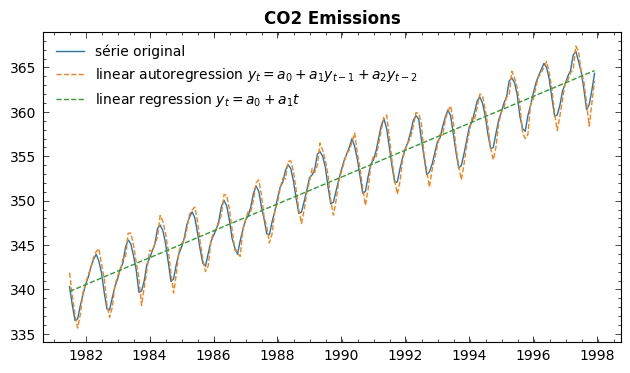

In [ ]:
import statsmodels.api as sm

# regressão
X = co2[['time']]
y = co2[['CO2']]

X = sm.add_constant(X)
y_regression = sm.OLS(y, X).fit().predict()

# auto regressão
X = co2[['CO2_t-1','CO2_t-2']]

X = sm.add_constant(X)
y_autoregression = sm.OLS(y, X).fit().predict()

# show results
plt.plot(co2.CO2,label='série original')
plt.plot(co2.index,y_autoregression, '--', label='linear autoregression $y_t = a_0 + a_1 y_{t-1} + a_2 y_{t-2}$')
plt.plot(co2.index,y_regression, '--', label='linear regression $y_t = a_0 + a_1 t$')

plt.legend(loc='upper left')
plt.title('CO2 Emissions')
plt.show()

## 3.2. Modelo ARIMA



Existem vários tipos de modelos, empregando diferentes princípios, para análise e previsões de séries temporais. O modelo ARIMA (Autorregressivos Integrados de Médias Móveis), é um modelo de análise estatística amplamente utilizado para modelar séries temporais estacionárias e não estacionárias, e constituir a base de modelos mais complexos (ARIMAX, VARIMAX, SARIMAX, ARCH, GARCH etc. envolvendo variáveis exógenas, sazonalidades e volatilidade de séries temporais). O ARIMA é, portanto, um modelo fundamental.

O modelo ARIMA consiste nos seguintes componentes:

* $AR (p)$ : Termo autoregressivo que incorpora a dependência entre uma observação e uma série de observações defasadas até a ordem $p$, o que pode ser escrito do seguinte modo:

$$Y_t=\phi_0 + \phi_1Y_{t-1}+ \phi_2Y_{t-2}+...+ \phi_pY_{t-p} + \epsilon_t,$$

onde $\epsilon_t$ é o erro do modelo.

* $I (d)$: Termo integrado que envolve diferenciar na ordem $d$ os dados da série temporal para torná-los estacionários.

$$W_t={\Delta^d Y_t} = Y_t - Y_{t-d}$$ 
e portanto,
$$ Y_t =  W_t + Y_{t-d}$$

* $MA (q)$: Termo de média móvel que leva em conta a dependência entre uma observação e um erro residual de um modelo de média móvel de ordem $q$.

$$Y_t=\mu + e_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} +...+ \theta_q \epsilon_{t-q} ,$$

onde $\mu$ é a média da série.

Tanto o modelo $AR$ como o modelo $MA$ são conceitualmente e podem ser calculados como uma regressão linear do valor atual da série, respectivamente sobre seus valores passados ($AR$) e os termos de erro com relação à média móvel ($MA$).
Ao final o modelo ARIMA completo pode ser escrito como:

$$W_t=\underbrace{\Delta^d Y_t}_{I(d)}$$

$${W_t} = \underbrace{\phi_0+ \phi_1 W_{t-1}+ \phi_2 W_{t-2}+...+\phi_p  W_{t-p}}_{AR(p)} +\underbrace{\epsilon_t + \theta_1 \epsilon_{t-1}+ \theta_2 \epsilon_{t-2}+...+ \theta_q \epsilon_{t-q}}_{MA(q)}, $$

$$ Y_t =  W_t + Y_{t-d}$$

Assim, o modelo ARIMA é a junção de modelos que podem também ser empregados de forma independente como segue.

<br>

\begin{array}{c c c}
\hdashline
\text{Model}&\text{ARIMA(p,q,d)}&\text{Tipo de Série}\\ \hdashline
AR(p) & ARIMA(p, 0, 0) & \text{estacionária} \\
MA(q) & ARIMA(0, 0, q) & \text{estacionária} \\
ARMA(p,q) & ARIMA(p, 0, q) & \text{estacionária} \\
ARIMA(p, d, q) & ARIMA(p, d, q) & \text{não estacionária} \\   \hdashline
\end{array}

<br>

E em todos os casos como vimos assume-se a independência e a normalidade dos resíduos da série.



### 3.2.1. Exemplo 1
Considerando a série $Y_t$ estacionária podemos considerar os seguintes modelos de ordem 1:

<br>

\begin{array}{c c }
\hdashline
\text{Modelo}&\text{ARIMA(p,q,d)}\\ \hdashline
AR(1) \space \text{ou} \space ARIMA(1,0,0) & Y_t=\phi_0 + \phi_1Y_{t-1} + \epsilon_t  \\
I(1) \space \text{ou} \space ARIMA(0,1,0) & Y_t= Y_{t-1} + \epsilon_t    \\
MA(1) \space \text{ou} \space ARIMA(0,0,1) & Y_t= \epsilon_t + \theta_1 \epsilon_{t-1}  \\
ARMA(1,1) \space \text{ou} \space ARIMA(1,0,1) & Y_t=\phi_0 + \phi_1Y_{t-1} + \epsilon_t + \theta_1 \epsilon_{t-1}  \\
  \hdashline
\end{array}

<br>



### 3.2.2. Exemplo 2

Considerando a série $Y_t$ estacionária para a diferenciação de ordem 1, podemos construir a série estacionária:

$$W_t = Y_t-Y_{t-1}$$

e, então, o modelo:


<br>

\begin{array}{c c }
\hdashline
\text{Modelo}&\text{ARIMA(p,q,d)}\\ \hdashline
ARIMA(1,1,1) & W_t=\phi_0 + \phi_1W_{t-1} + \epsilon_t + \theta_1 \epsilon_{t-1}    \\
  \hdashline
\end{array}

<br>

Em que é ajustado um modelo ARMA(1,1) à série diferenciada $W_t$.



### 3.2.3. Exemplo 3

 Modelos de *suavização*, uma outra técnica bastante empregada em séries temporais, também podem ser derivados de modelos ARIMA como o modelo básico de suavização (ARIMA(0,1,1)), o modelo de *Holt Amortecido* (ARIMA(0,1,2)) e o método linear de Holt (ARIMA(0,2,2)). E o modelo ARIMA Sazonal, SARIMA(p,d,q)(P,D,Q), consiste em um modelo ARIMA em que a componente sazonal é também modelada do mesmo modo com os parâmetros P, D, Q.

## 3.3. Autocorrelação e autocorrelação parcial



A correlação de duas variáveis  $x, y$  refere-se à sua dependência linear e é dada por:

$$ \rho(x,y) = \frac{cov(x,y)}{\sqrt{var(x)var(x)}} $$

Em séries temporais, nos referimos à *autocorrelação* à correlação entre valores da mesma série para intervalos de tempo diferentes e, por exemplo a correlação do valor atual com o valor do instante anterior da série é dado por:

$$ \rho(x_t,x_{t-1}) = \frac{cov(x_t,x_{t-1})}{\sqrt{var(x_t)var(x_{t-1})}} $$

A função ACF (*Autocorrelation Function*) fornece os valores de autocorrelação para diferentes defasagens de valores ($x_{t-1}, x_{t-2},...$) e fornece uma boa estimativa para os valores $q$ do modelo AR. A função ACF considera todos os valores intermediários, isto é, a correlação de $x_t$ e $x_{t-k}$ inclui cadeia de dependência de todos os têrmos entre os dois valores. A função PACF (*Partial Autocorrelation Function*) estima os valores de autocorrelação para diferentes defasagens de valores ($x_{t-1}, x_{t-2},...$) somente para o último elemento, excluindo as dependências anteriores. Ela fornece uma boa estimativa para os valores $p$ do modelo AR.

<br>

\begin{array}{c c c c}
\hdashline
\text{Função} & MA(q) & AR(p) & ARMA(p,q) \\ \hdashline
ACF & \text{Desprezível após } q & \text{Decaimento}^1 & \text{Decaimento}^1 \text{após } q \\
PACF & \text{Decaimento}^1 & \text{Desprezível após } p  & \text{Decaimento}^1 \text{após } p \\ \hdashline
\end{array}

$^1$ *Decaimento tipo exponencial ou sinusoide*

<br>

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_ts_acf_pacf(ts,model_name):
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(15,3.5))

  ax1.plot(ts,linestyle='solid',alpha=1,lw=1)
  ax1.title.set_text('Série ' + model_name)
  plot_acf(ts, ax=ax2, title='ACF ' + model_name)
  y=plot_pacf(ts, ax=ax3, title='PACF ' + model_name)

  plt.tight_layout()
  plt.show()
  return

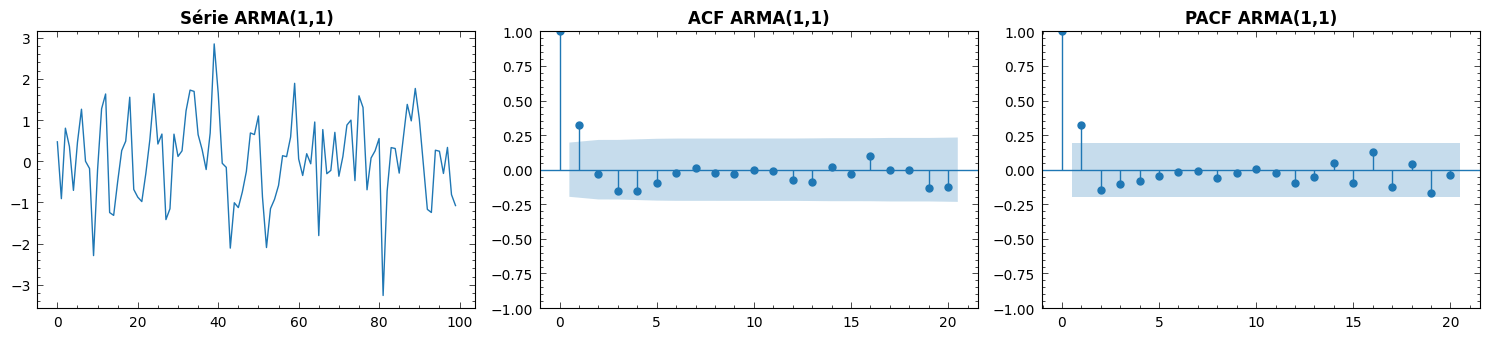

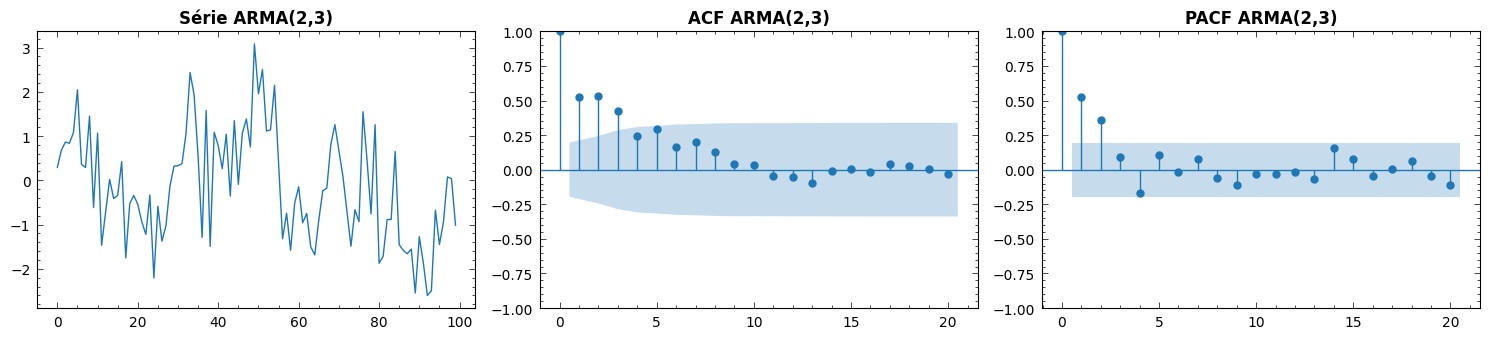

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(1234)

model_name = 'ARMA(1,1)'
ar = np.array([1,-0.3,0,0,0,0]) # list ar_coefs has the form [1, -a_1, -a_2, ..., -a_p]
ma = np.array([1,0.3,0,0,0,0])  # list ma_coefs has the form [1, m_1, m_2, ..., m_q]
ts = arma_generate_sample(ar, ma, nsample=100)
plot_ts_acf_pacf(ts,model_name)

model_name = 'ARMA(2,3)'
ar = np.array([1,-0.4,-0.3,0,0,0])
ma = np.array([1])
ts = arma_generate_sample(ar, ma, nsample=100)
plot_ts_acf_pacf(ts,model_name)

Os gráficos ACF e PACF são ferramentas usadas para identificar a estrutura de correlação de dados de séries temporais. O gráfico ACF mostra a correlação da série com seus atrasos, fornecendo insights sobre o padrão geral de autocorrelação, o que ajuda a identificar a influência de valores passados ​​em valores atuais. O gráfico PACF, por outro lado, revela a correlação parcial da série com seus atrasos, controlando os efeitos de atrasos mais curtos, destacando assim a influência direta de valores passados.

```
=0 nenhuma correlação 
>0 correlação 
<0 correlação negativa
```

## OCULTO

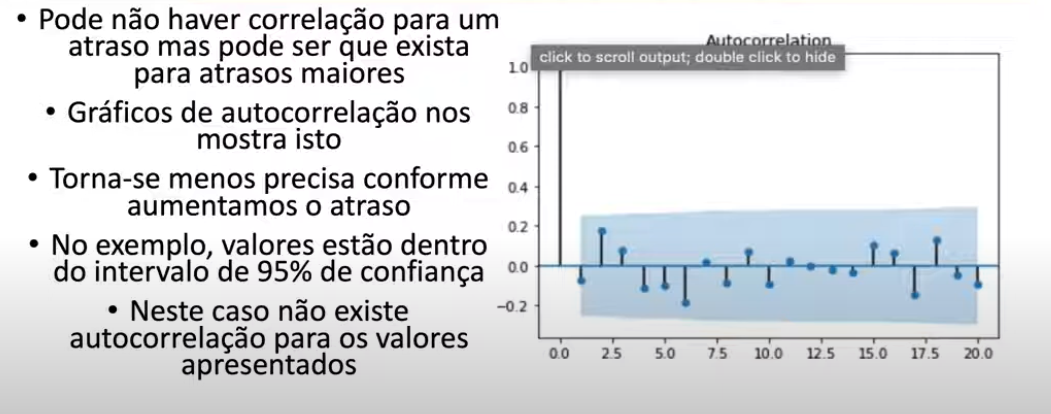
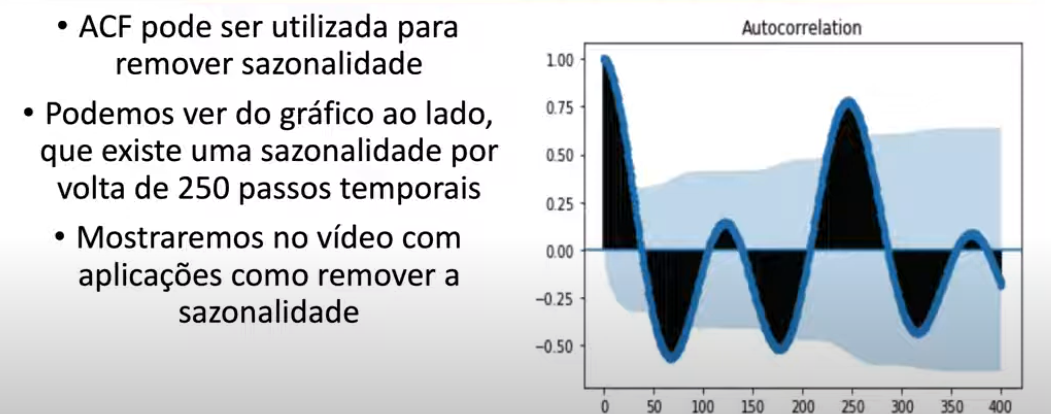


Funções de autocorrelação e autocorrelação parcial - Definição
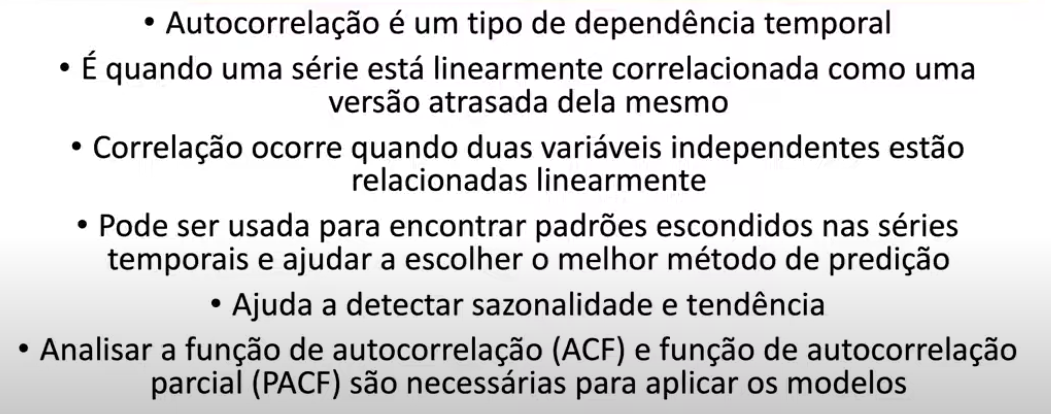

## 3.4. Aplicando um modelo ARIMA

Após uma exploração e entendimento dos dados a aplicação do modelo ARIMA envolve, desse modo, os seguintes passos:

1. **Análise da estacionariedade da série**, e escolha do parâmetro $d$ de diferenciação que torna a série estacionária nos casos em que não é estacionária.
2. **Verificação da autocorrelação e autocorrelação parcial da série**, identificando os potenciais valores $p$ (através da PACF) e $q$ (através da ACF) do modelo.
3. **Análise dos modelos e seleção dos parâmetros**, seguindo alguma métrica de desempenho do modelo como o critério de informação de Akaike (AIC) ou o critério Bayesiano de Schwarz (BIC) $^1$.
4. **Análise dos resíduos**, observando-se a normalidade e independência dos resíduos.
5. **Previsões**, com o modelo selecionado.


$^1$ Note que a escolha de valores $p$ (através do PACF) e $q$ (através ACF) influenciam-se mutuamente e, por exemplo, não pode haver uma autocorrelação parcial de ordem 1 com uma correlação de ordem 0.







### 3.4.1. Análise da estacionariedade da série

Vamos produzir uma série sintética simulando uma série ARIMA(2,1,3). A série original é não estacionária mas a série diferenciada de ordem 1 torna-se estacionária. Obtemos então nosso parâmetro $d=1$.

In [ ]:
#@markdown
def simulate_ARIMA(phi = np.array([0]), theta = np.array([0]), d = 0, t = 0, mu = 0, sigma = 1, n = 20, burn = 10, seed=1):
# adaptado de https://github.com/TOMILO87
    """ Simulate data from ARMA model (eq. 1.2.4):

    z_t = phi_1*z_{t-1} + ... + phi_p*z_{t-p} + a_t + theta_1*a_{t-1} + ... + theta_q*a_{t-q}

    with d unit roots for ARIMA model.

    Arguments:
    phi -- array of shape (p,) or (p, 1) containing phi_1, phi2, ... for AR model
    theta -- array of shape (q) or (q, 1) containing theta_1, theta_2, ... for MA model
    d -- number of unit roots for non-stationary time series
    t -- value deterministic linear trend
    mu -- mean value for normal distribution error term
    sigma -- standard deviation for normal distribution error term
    n -- length time series
    burn -- number of discarded values because series beginns without lagged terms
    seed -- numpy random state

    Return:
    x -- simulated ARMA process of shape (n, 1)

    Reference:
    Time Series Analysis by Box et al.
    """
    np.random.seed(seed)

    # add "theta_0" = 1 to theta
    theta = np.append(1, theta)

    # set max lag length AR model
    p = phi.shape[0]

    # set max lag length MA model
    q = theta.shape[0]

    # simulate n + q error terms
    a = np.random.normal(mu, sigma, (n + max(p, q) + burn, 1))

    # create array for returned values
    x = np.zeros((n + max(p, q) + burn, 1))

    # initialize first time series value
    x[0] = a[0]

    for i in range(1, x.shape[0]):
        AR = np.dot(phi[0 : min(i, p)], np.flip(x[i - min(i, p) : i], 0))
        MA = np.dot(theta[0 : min(i + 1, q)], np.flip(a[i - min(i, q - 1) : i + 1], 0))
        x[i] = AR + MA + t

    # add unit roots
    if d != 0:
        ARMA = x[-n: ]
        m = ARMA.shape[0]
        z = np.zeros((m + 1, 1)) # create temp array

        for i in range(d):
            for j in range(m):
                z[j + 1] = ARMA[j] + z[j]
            ARMA = z[1: ]
        x[-n: ] = z[1: ]

    return x[-n: ]



In [ ]:
df = simulate_ARIMA(phi = np.array([0.8]), theta = np.array([0.6, 0.2]), d=1, n = 100)
df = pd.DataFrame(df.flatten(),columns=['values'])
df.index = pd.date_range(start='6/1/2015', periods = 100, freq='M')
df.head()

values
2015-06-30 -2.453310
2015-07-31 -3.577104
2015-08-31 -4.972580
2015-09-30 -6.694570
2015-10-31 -9.273456

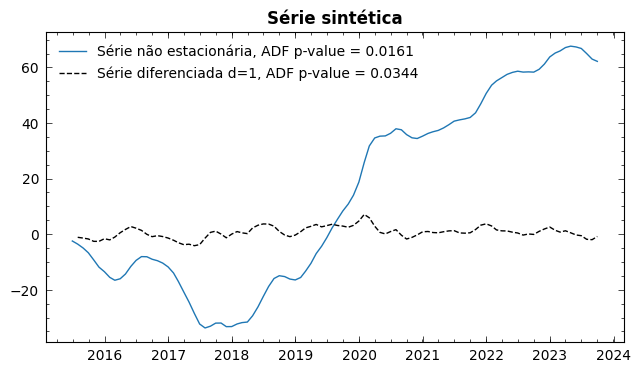

In [ ]:
plt.plot(df, label = 'Série não estacionária, ADF p-value = ' + str(np.round(adfuller(ts)[1],4)))
plt.plot(df.diff(), 'k--', label = 'Série diferenciada d=1, ADF p-value = ' + str(np.round(adfuller(df.diff().dropna())[1],4)))

plt.legend()
plt.title('Série sintética')
plt.show()


### 3.4.2. Verificação da autocorrelação e autocorrelação parcial da série

Os parâmetros $p$ e $q$ são obtidos respectivamente da análise dos gráficos de autocorrelação parcial e autocorrelação, e obtemos assim os valores $p=3$ e $q=3$.

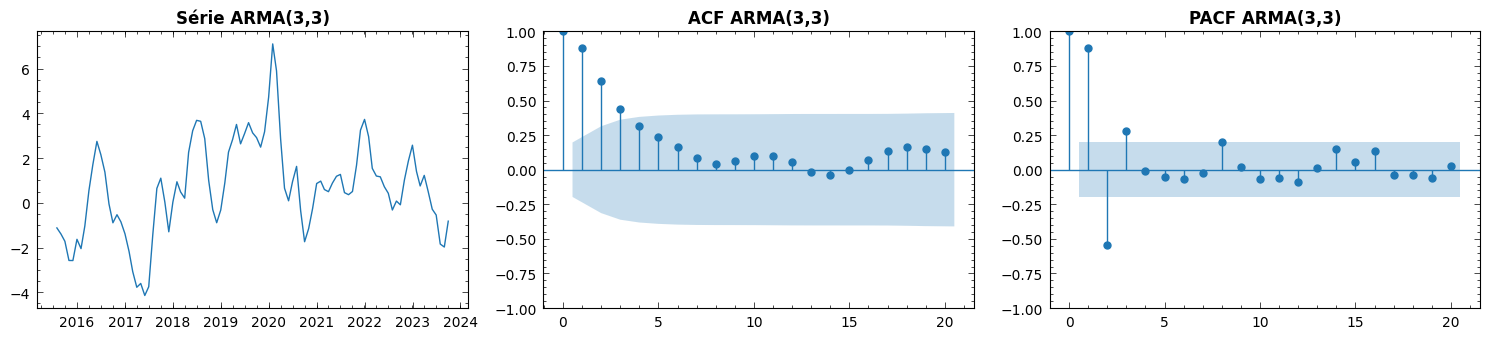

In [ ]:
plot_ts_acf_pacf(df.diff().dropna(),'ARMA(3,3)')

### 3.4.3. Análise dos modelos e seleção dos parâmetros

Podemos então aplicar esses parâmetros e analisar o ajuste da série e métricas do modelo obtido.

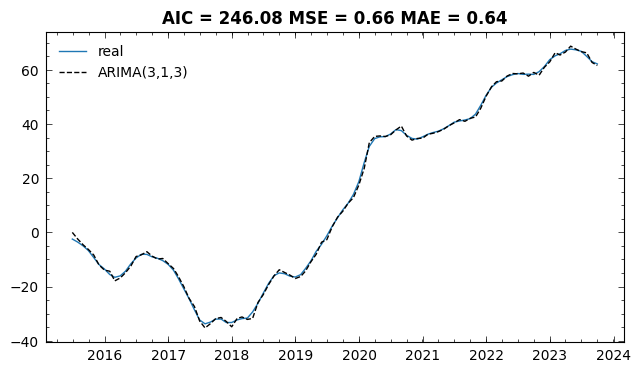

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

p = 3; d = 1; q = 3
model = ARIMA(df, order=(p, d, q))
results = model.fit(method_kwargs={'maxiter':700})

plt.plot(df,label='real')
plt.plot(results.fittedvalues, 'k--', label='ARIMA(' + str(p) + ',' + str(d) + ',' + str(q) + ')')
plt.title(f'AIC = {results.aic:.2f} MSE = {results.mse:.2f} MAE = {results.mae:.2f}')

plt.legend()
plt.show()

O sumário do `statsmodels` fornece uma série de informações para análise do modelo.

In [ ]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                 values   No. Observations:                  100
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -116.041
Date:                Sat, 13 Jan 2024   AIC                            246.083
Time:                        04:16:33   BIC                            264.248
Sample:                    06-30-2015   HQIC                           253.432
                         - 09-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4131      0.357      3.955      0.000       0.713       2.113
ar.L2         -1.2381      0.399     -3.106      0.002      -2.019      -0.457
ar.L3          0.6095      0.198      3.072      0.0

Ele consiste de 3 partes. Na primeira parte há informações gerais do modelo, como ordem do modelo, número de amostras e métricas como o AIC e BIC. Na segunda, há os coeficientes estimados, sua significância e intervalo de confiança. A terceira parte traz indicadores para análise dos resíduos.

Os gráficos das funções PACF e ACF sugerem valores de $p$ e $q$ a serem empregados. Mas podemos buscar alguma métrica de desempenho do modelo, como uma métrica de erro ou o AIC, para busca dos melhores parâmetros.

In [ ]:
warnings.filterwarnings('ignore')
model_list = []; AIC_list = []

d = 1
for p in range(2,5):
  for q in range(2,5):
    model = ARIMA(df, order=(p, d, q))
    results = model.fit(method_kwargs={'maxiter':700})
    model_list.append('ARIMA(' + str(p) + ',' + str(d) + ',' + str(q) + ')')
    AIC_list.append(np.round(results.aic,4))

results_df = pd.DataFrame({'model': model_list, 'AIC': np.array(AIC_list) }).sort_values('AIC',ascending=False)
display(results_df)

warnings.filterwarnings('ignore')

model       AIC
2  ARIMA(2,1,4)  248.3544
6  ARIMA(4,1,2)  247.5014
1  ARIMA(2,1,3)  247.3347
4  ARIMA(3,1,3)  246.0826
3  ARIMA(3,1,2)  246.0429
8  ARIMA(4,1,4)  245.6695
0  ARIMA(2,1,2)  245.4423
5  ARIMA(3,1,4)  245.4241
7  ARIMA(4,1,3)  244.4067

Assim, para o melhor desempenho pela métrica AIC podemos escolher os valores $p = 2, d = 1, q = 4$ e, então, analisar se os erros obtidos satisfazem as premissas do modelo.

In [ ]:
p = 2; d = 1; q = 4
model = ARIMA(df, order=(p, d, q))
results = model.fit(method_kwargs={'maxiter':700})
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                 values   No. Observations:                  100
Model:                 ARIMA(2, 1, 4)   Log Likelihood                -117.177
Date:                Sat, 13 Jan 2024   AIC                            248.354
Time:                        04:16:37   BIC                            266.520
Sample:                    06-30-2015   HQIC                           255.704
                         - 09-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4308      0.556      2.574      0.010       0.341       2.520
ar.L2         -0.4610      0.464     -0.994      0.320      -1.370       0.448
ma.L1          0.0946      0.562      0.168      0.8

### 3.4.4. Análise dos resíduos

Na parte dos indicadores de resíduos os valores `Prob` correspondem a p-valores das métricas indicadas (no exemplo, p-value Ljung-Box = 0.92 > 0.05 indica que os resíduos são ruído branco e p-value Jarque-Bera = 0.66 > 0.05 indica que os resíduos tem uma distribuição normal).

A análise dos resíduos ainda é normalmente complementada com análise dos gráficos da função `plot_diagnostics()` para, além da normalidade, verificarmos a independência dos valores de erro. No exemplo, como podemos ver, os erros não estão corelacionados.

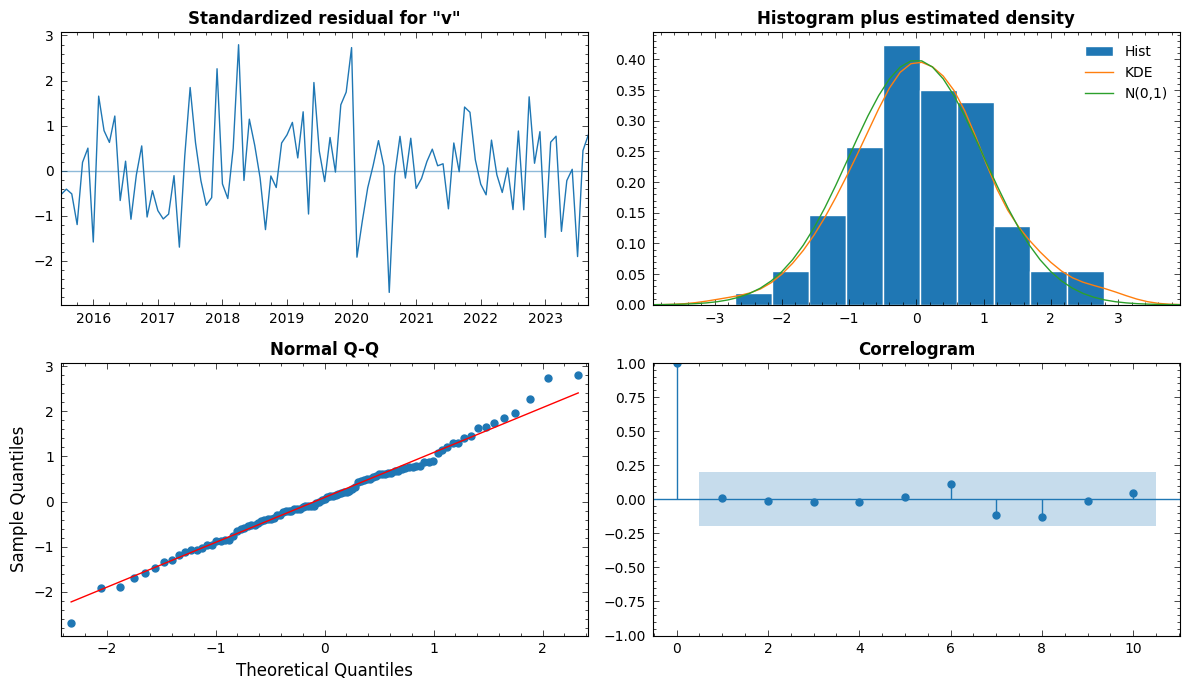

In [ ]:
fig = plt.figure(figsize=(12,7))

results.plot_diagnostics(fig=fig)

plt.tight_layout()
plt.show()

### 3.4.5. Previsões

Uma vez selecionado o modelo podemos fazer previsões de valores futuros da série. Por exemplo, a predição para os próximos 6 meses.


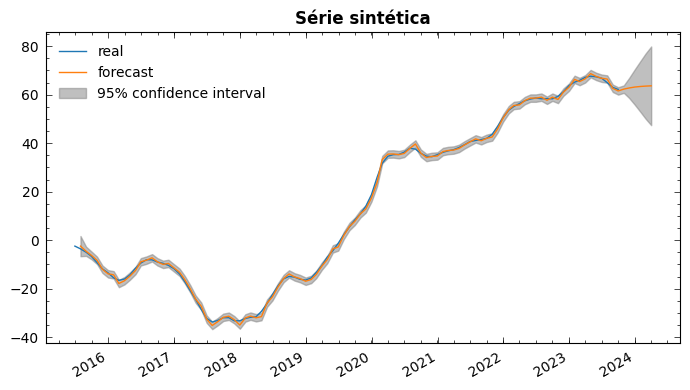

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict

fig, ax = plt.subplots(figsize=(7,4))
ax.plot(df,label='real')
plot_predict(results, start=pd.to_datetime('2015-07-31'), end=pd.to_datetime('2024-03-31'),ax=ax) # alerta: start deve ser ao menos d períodos a frente do início da série
# plot_predict(results, start=1, end=len(ts) + 6,ax=ax) # aqui, funciona o mesmo modo

ax.set_title('Série sintética')
plt.tight_layout()
plt.show()

In [ ]:
results.forecast(6)

2023-10-31    62.313898
2023-11-30    62.791316
2023-12-31    63.171009
2024-01-31    63.401228
2024-02-29    63.555601
2024-03-31    63.670354
Freq: M, Name: predicted_mean, dtype: float64

## Modelo  `ARIMA(p,d,q)` Exemplo

### Transformando os dados em timeseries - > index data

In [50]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df = pd.read_csv('https://github.com/Introducao-Series-Temporais-em-Python/Book/raw/main/Data/co2.csv')
df.head()

Date  time     CO2
0  1981-05-01     0  342.74
1  1981-06-01     1  342.08
2  1981-07-01     2  340.32
3  1981-08-01     3  338.26
4  1981-09-01     4  336.52

In [54]:
df.index = pd.to_datetime(df.Date)
df.drop(['Date','time'], axis=1, inplace=True)
df.head()

CO2
Date              
1981-05-01  342.74
1981-06-01  342.08
1981-07-01  340.32
1981-08-01  338.26
1981-09-01  336.52

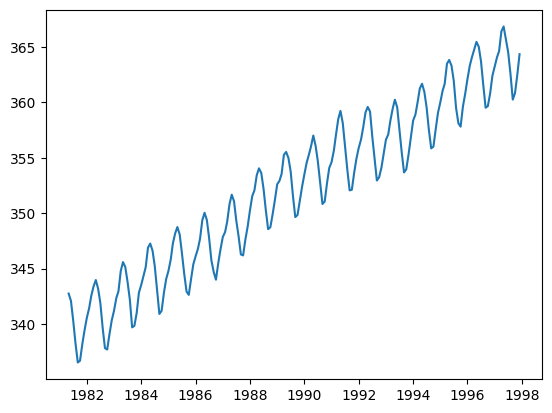

In [55]:
plt.plot(df.CO2)
plt.show()

### Decomposição T+S+R

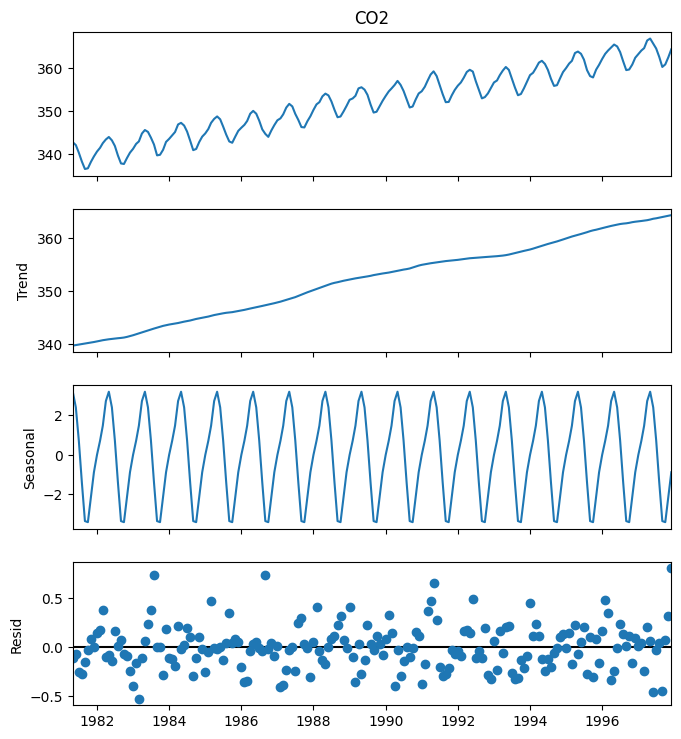

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['CO2'], model='additive', extrapolate_trend=1)

fig = result.plot()
fig.set_size_inches((7, 8))
plt.show()

### 2. Verificar a Estacionariedade (`d`)

In [57]:
from statsmodels.tsa.stattools import adfuller

# Realiza o teste ADF
result = adfuller(df['CO2'])

# Imprime os resultados
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpreta os resultados
if result[1] <= 0.05:
    print("A série temporal é estacionária.")
else:
    print("A série temporal não é estacionária.")

ADF Statistic: -0.383559
p-value: 0.912808
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575
A série temporal não é estacionária.


In [58]:
df.head()

CO2
Date              
1981-05-01  342.74
1981-06-01  342.08
1981-07-01  340.32
1981-08-01  338.26
1981-09-01  336.52

In [ ]:
df['CO2'].diff()

Date
1981-05-01     NaN
1981-06-01   -0.66
1981-07-01   -1.76
1981-08-01   -2.06
1981-09-01   -1.74
              ... 
1997-08-01   -1.95
1997-09-01   -2.33
1997-10-01    0.59
1997-11-01    1.66
1997-12-01    1.85
Name: CO2, Length: 200, dtype: float64

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Realiza o teste ADF
result = adfuller(df['CO2'].diff().dropna())

# Imprime os resultados
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpreta os resultados
if result[1] <= 0.05:
    print("A série temporal é estacionária.")
else:
    print("A série temporal não é estacionária.")

ADF Statistic: -3.259019
p-value: 0.016813
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575
A série temporal é estacionária.


### 3. Verificar os Parâmetros PACF e ACF (`p`, `q`)

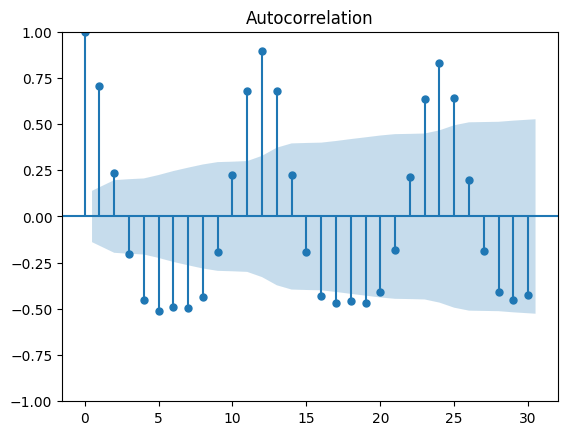

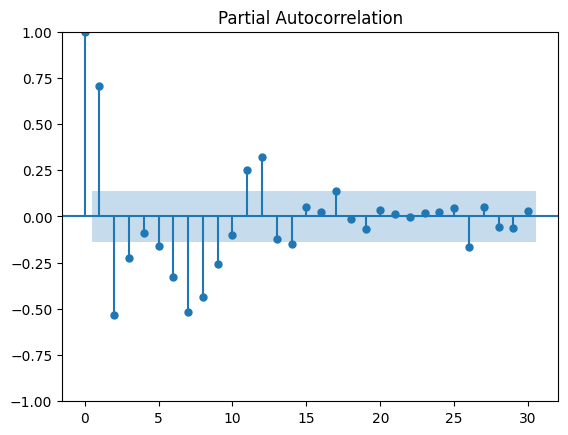

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plota a função de autocorrelação (ACF)
plot_acf(df['CO2'].diff().dropna(), lags=30)
plt.show()

# Plota a função de autocorrelação parcial (PACF)
plot_pacf(df['CO2'].diff().dropna(), lags=30)
plt.show()

### 4. Construa o modelo

* Obtenha o AIC
* Summary

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


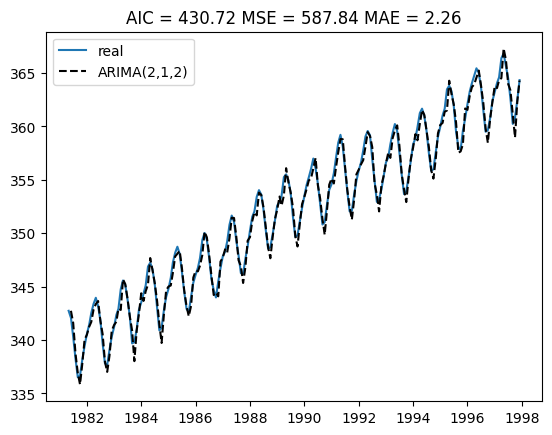

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

p = 2; d = 1; q = 2
model = ARIMA(df, order=(p, d, q))
results = model.fit(method_kwargs={'maxiter':700})

plt.plot(df,label='real')
plt.plot(results.fittedvalues[1::], 'k--', label='ARIMA(' + str(p) + ',' + str(d) + ',' + str(q) + ')')
plt.title(f'AIC = {results.aic:.2f} MSE = {results.mse:.2f} MAE = {results.mae:.2f}')

plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


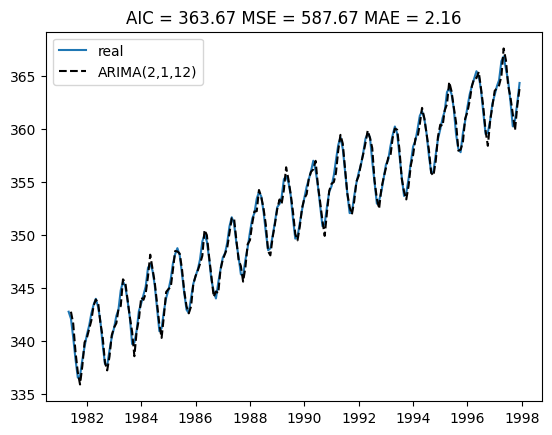

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

p = 2; d = 1; q = 12
model = ARIMA(df, order=(p, d, q))
results = model.fit(method_kwargs={'maxiter':700})

plt.plot(df,label='real')
plt.plot(results.fittedvalues[1::], 'k--', label='ARIMA(' + str(p) + ',' + str(d) + ',' + str(q) + ')')
plt.title(f'AIC = {results.aic:.2f} MSE = {results.mse:.2f} MAE = {results.mae:.2f}')

plt.legend()
plt.show()

In [ ]:
results.fittedvalues[0:10]

Date
1981-05-01      0.000000
1981-06-01    342.740220
1981-07-01    341.644360
1981-08-01    338.956783
1981-09-01    337.028325
1981-10-01    335.868967
1981-11-01    337.633586
1981-12-01    339.845350
1982-01-01    340.270127
1982-02-01    341.104567
dtype: float64

In [ ]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                    CO2   No. Observations:                  200
Model:                ARIMA(2, 1, 12)   Log Likelihood                -166.833
Date:                Wed, 06 Nov 2024   AIC                            363.665
Time:                        21:33:19   BIC                            413.065
Sample:                    05-01-1981   HQIC                           383.659
                         - 12-01-1997                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1991      0.124      9.704      0.000       0.957       1.441
ar.L2         -0.6036      0.116     -5.226      0.000      -0.830      -0.377
ma.L1         -0.5903      1.112     -0.531      0.5

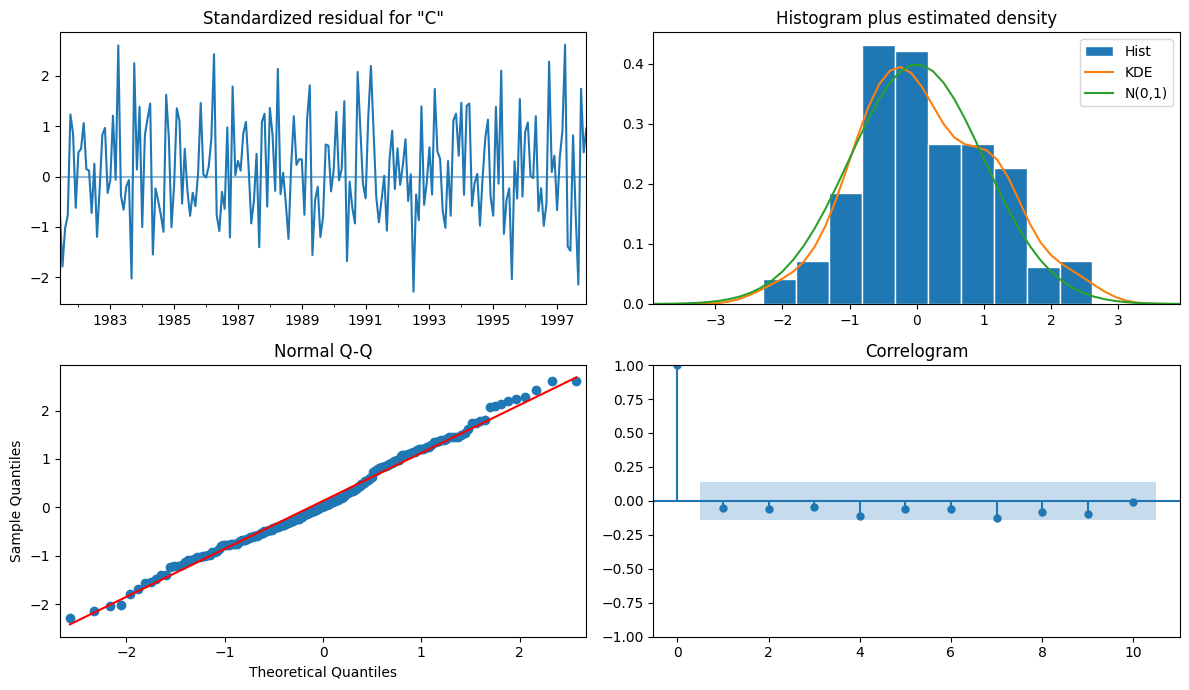

In [ ]:
fig = plt.figure(figsize=(12,7))

results.plot_diagnostics(fig=fig)

plt.tight_layout()
plt.show()

### 5. Predição para os próximos 3 períodos

In [ ]:
results.forecast(3)

1998-01-01    365.472091
1998-02-01    365.976164
1998-03-01    366.064720
Freq: MS, Name: predicted_mean, dtype: float64

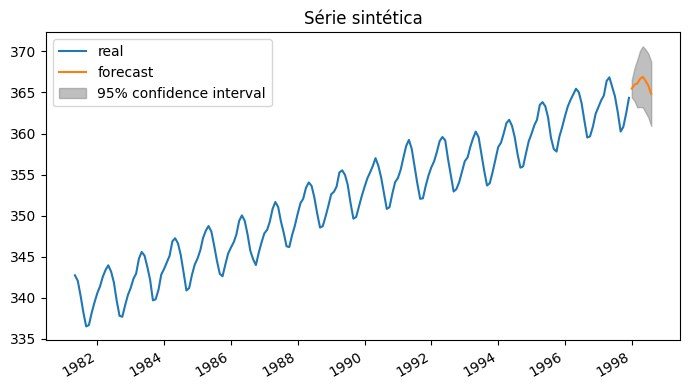

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict

fig, ax = plt.subplots(figsize=(7,4))
ax.plot(df,label='real')
plot_predict(results, start=pd.to_datetime('1998-01-01'), end=pd.to_datetime('1998-08-01'),ax=ax) # alerta: start deve ser ao menos d períodos a frente do início da série
# plot_predict(results, start=1, end=len(ts) + 6,ax=ax) # aqui, funciona o mesmo modo

ax.set_title('Série sintética')
plt.tight_layout()
plt.show()

### 6. Qual o RMSE e MAPE

* Para a série ajustada
* Para as 3 novas predições (hahaha)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Calcular o RMSE
rmse = np.sqrt(mean_squared_error(df.CO2[1::], results.fittedvalues[1::]))

# Calcular o MAPE
mape = mean_absolute_percentage_error(df.CO2[1::], results.fittedvalues[1::])

print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4f}")

RMSE: 0.5612
MAPE: 0.0013


# TEORIA

## arvore


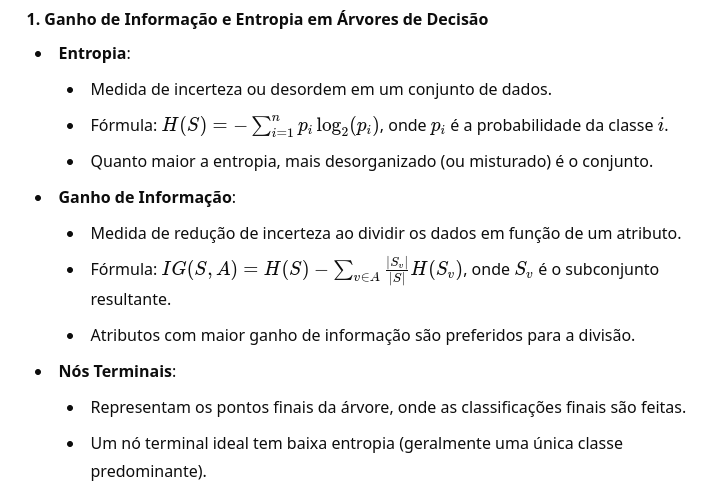

- Interpretação fácil.
- Dividem os dados com base em critérios como ganho de informação.
- Podem sofrer de overfitting se muito profundas.

## modelos de classificação

Árvores de Decisão:

- Interpretação fácil.
- Dividem os dados com base em critérios como ganho de informação.
- Podem sofrer de overfitting se muito profundas.

Naive Bayes:
 
- Baseado no Teorema de Bayes e assume independência entre os atributos.
- Simples e eficiente para textos e dados categóricos.

K-Nearest Neighbors (KNN):
 
- Classifica com base na proximidade aos 𝑘 vizinhos mais próximos.
- Não paramétrico, mas pode ser lento para grandes conjuntos de dados.

SVM (Support Vector Machines):
 
- Encontra um hiperplano que melhor separa as classes.
- Eficiente para dados de alta dimensionalidade.

Redes Neurais:
 
- Modelos complexos, capazes de capturar relações não lineares.
- Requerem muitos dados e poder computacional.

Regressão Logística:
 
- Modelo linear usado para problemas de classificação binária.
- Interpretação probabilística das previsões.
- 

## Cross-Validation e Conjunto de Validação


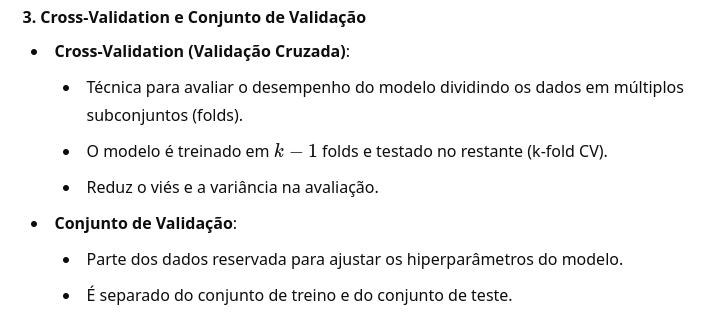

## Métricas de Classificação (sem cálculo)


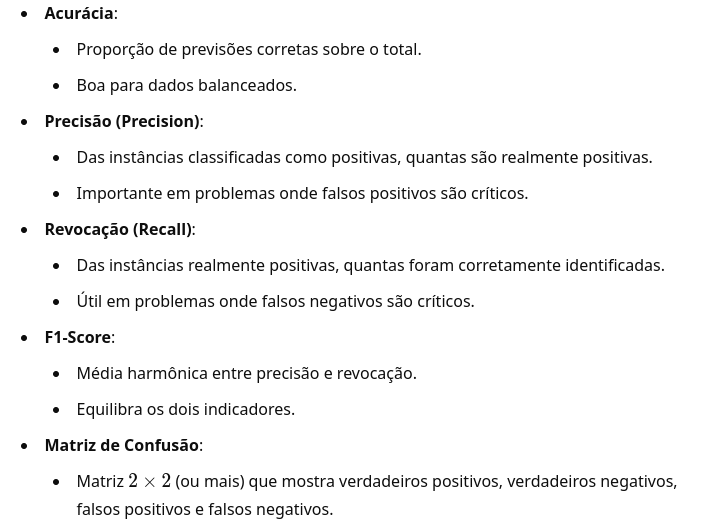

## 5. TF-IDF e Distância Cosseno


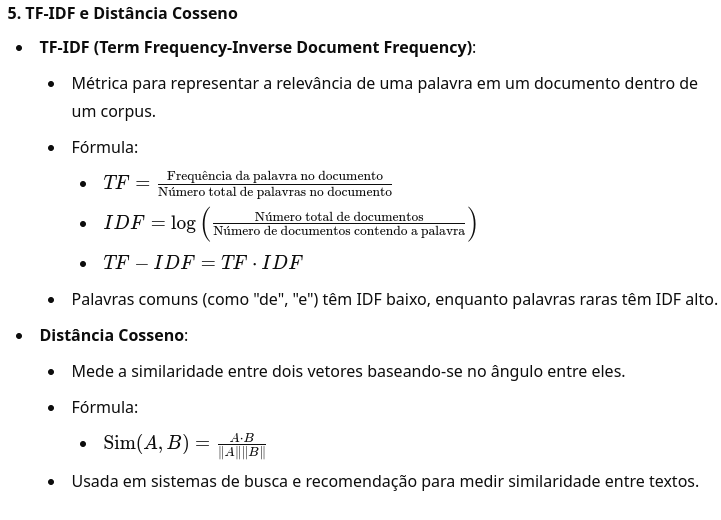

## Series temporais

#### Características das Séries Temporais



Tendência (T):

- Refere-se à direção de longo prazo dos dados (aumento, diminuição ou estabilidade).
- Exemplo: Crescimento econômico ao longo dos anos.

Sazonalidade (S):

- Padrões que se repetem em intervalos regulares (diários, mensais, anuais, etc.).
- Exemplo: Vendas de roupas que aumentam no inverno e diminuem no verão.

Ruído (R):

- Flutuações aleatórias e imprevisíveis nos dados, sem padrão específico.
- Exemplo: Erros de medição, condições climáticas imprevistas.

Ciclos:

- Flutuações de longo prazo nos dados, mas com padrões menos previsíveis que a sazonalidade.
- Exemplo: Ciclos econômicos de expansão e recessão, que não ocorrem em intervalos fixos.

### ARIMA(p, d, q)
- Modelo: Combina 3 componentes:

    - AR (Autoregressivo): Depende de valores passados (𝑝).
    - I (Integração): Torna a série estacionária (𝑑).
    - MA (Média Móvel): Modela (depende) erros passados (𝑞).

Este modelo é útil para prever séries temporais univariadas quando não há sazonalidade e os dados são estacionários ou podem ser transformados para estacionariedade.

###### +

Características do Modelo ARIMA
O modelo ARIMA é composto por três componentes principais:

AR (Autoregressivo):

- A variável dependente é modelada como uma função de seus próprios valores passados.
- Representado por 𝑝, que é a ordem do modelo autoregressivo.
Exemplo: Se um valor em um momento depende dos valores dos períodos anteriores (ex.: preço das ações no dia seguinte depende dos dias anteriores).

I (Integração):

- Utiliza diferenciação para tornar a série temporal estacionária (remover tendência).
- Representado por 𝑑, que é o número de vezes que os dados são diferenciados.
Exemplo: Uma série com uma tendência crescente é diferenciada para transformar essa tendência em uma série estacionária.

MA (Média Móvel):

- Modela o erro da previsão como uma combinação linear dos erros passados.
- Representado por 𝑞, que é a ordem do modelo de média móvel.
Exemplo: Erros de previsão dos períodos anteriores influenciam as previsões futuras.


### Preparação dos dados

- index = `datetime`: Certifique-se de que o índice dos dados está no formato datetime.
- `resample()`: Reamostre os dados para a granularidade desejada (ex.: diário, mensal).


In [83]:
data = df.resample('M').mean()
data

/tmp/ipykernel_20827/1951387136.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = df.resample('M').mean()


vista R$  vista US$
Data                           
2014-01-31    288.98     119.88
2014-02-28    366.32     153.96
2014-03-31    437.24     187.79
2014-04-30    449.45     201.45
2014-05-31    429.28     193.22
...              ...        ...
2023-09-30    810.91     164.01
2023-10-31    829.44     163.82
2023-11-30    888.00     181.31
2023-12-31    974.46     198.90
2024-01-31   1003.74     204.34

[121 rows x 2 columns]

In [ ]:
# resample dos dados por ano
df_year = df.resample('Y').mean()
df_year.head()

vista R$   vista US$
Data                              
2014-12-31  418.572500  177.984167
2015-12-31  451.494167  137.497500
2016-12-31  494.522500  142.853333
2017-12-31  465.690833  146.050833
2018-12-31  435.646667  120.087500

In [89]:
import pandas as pd
import numpy as np

# Generate a date range for the time series index
date_rng = pd.date_range(start='1/1/2023', periods=100, freq='D')

# Create a sample time series data with random values
data = np.random.randn(100)

# Create the pandas Series with the datetime index
time_series = pd.DataFrame(data, index=date_rng)
time_series.columns = ['value']
time_series

value
2023-01-01  1.192418
2023-01-02 -0.704335
2023-01-03 -0.091741
2023-01-04  1.458614
2023-01-05 -0.430038
...              ...
2023-04-06 -1.123814
2023-04-07 -2.261105
2023-04-08  0.557040
2023-04-09  0.133118
2023-04-10 -0.547189

[100 rows x 1 columns]

In [90]:
time_series['value_t-1'] = time_series['value'].shift(1)
time_series['value_t-2'] = time_series['value'].shift(2)
time_series['value_t-3'] = time_series['value'].shift(3)
time_series

value  value_t-1  value_t-2  value_t-3
2023-01-01  1.192418        NaN        NaN        NaN
2023-01-02 -0.704335   1.192418        NaN        NaN
2023-01-03 -0.091741  -0.704335   1.192418        NaN
2023-01-04  1.458614  -0.091741  -0.704335   1.192418
2023-01-05 -0.430038   1.458614  -0.091741  -0.704335
...              ...        ...        ...        ...
2023-04-06 -1.123814  -0.357885   0.097523   0.535034
2023-04-07 -2.261105  -1.123814  -0.357885   0.097523
2023-04-08  0.557040  -2.261105  -1.123814  -0.357885
2023-04-09  0.133118   0.557040  -2.261105  -1.123814
2023-04-10 -0.547189   0.133118   0.557040  -2.261105

[100 rows x 4 columns]

#### teste de estácionariedade - adfuller() 

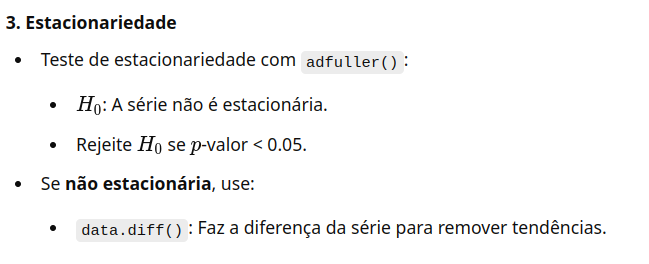

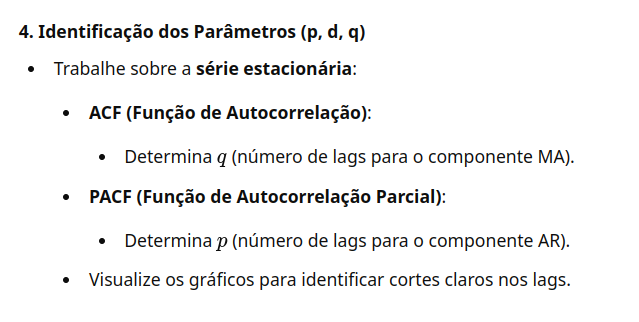

### Criando o modelo 

In [87]:
df

vista R$  vista US$
Data                           
2014-01-01    288.98     119.88
2014-02-01    366.32     153.96
2014-03-01    437.24     187.79
2014-04-01    449.45     201.45
2014-05-01    429.28     193.22
...              ...        ...
2023-09-01    810.91     164.01
2023-10-01    829.44     163.82
2023-11-01    888.00     181.31
2023-12-01    974.46     198.90
2024-01-01   1003.74     204.34

[121 rows x 2 columns]

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
p =1
d =0
q=1
model = ARIMA(df, order=(p, d, q))
results = model.fit()
print(results.summary())


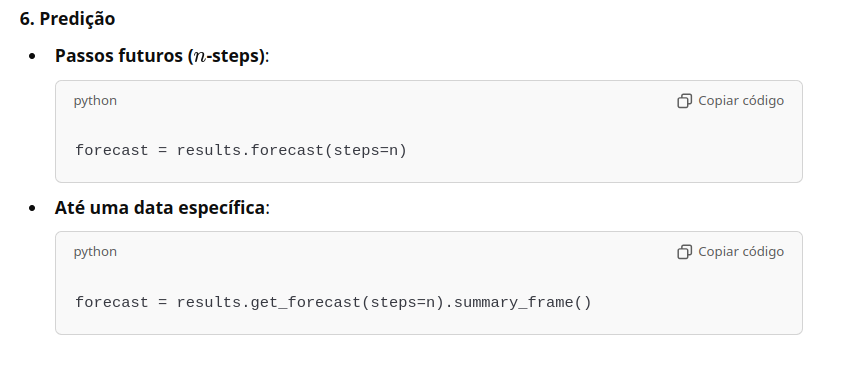

### Erro de uma serie 
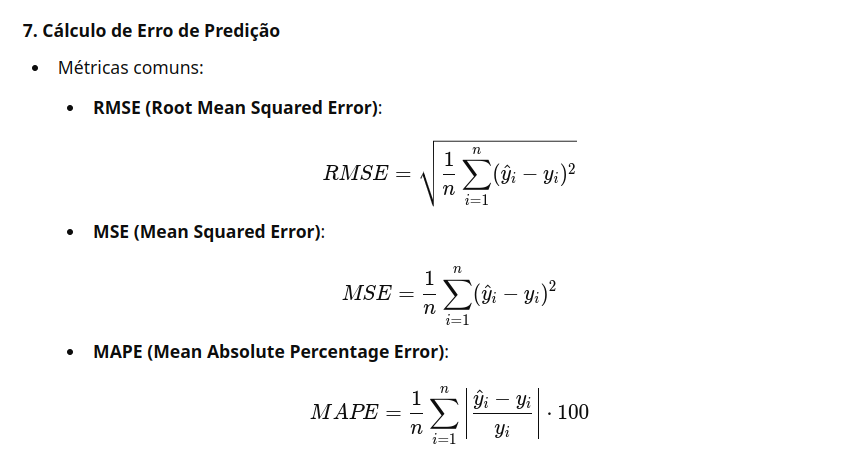

# Exercicios

1. "A clusterização hierárquica é determinística, isto é, sucessivas execuções do mesmo estimador levam a clusters sucessivamente iguais."


Verdadeiro:
A clusterização hierárquica é determinística porque não envolve inicializações aleatórias, como ocorre no k-means. Dada a mesma entrada e método (aglomeração ou divisão), os resultados serão sempre os mesmos.


2. "Tanto a clusterização hierárquica como o k-means são sensíveis à normalização dos dados."

Verdadeiro:
Tanto o k-means quanto a clusterização hierárquica utilizam métricas de distância (como a Euclidiana). Esses métodos são sensíveis à escala dos dados, então normalizá-los (ex.: usando z-score ou min-max) pode afetar significativamente os resultados.

3. "O método da inércia ('método do cotovelo') só é aplicável à clusterização k-means (isto é, não se aplica à clusterização hierárquica)."

Verdadeiro:
O método do cotovelo é usado para determinar o número ideal de clusters no k-means, com base na inércia (soma das distâncias ao centróide). Na clusterização hierárquica, usa-se o dendograma para determinar os clusters, não havendo o conceito de inércia.

4. "Na clusterização hierárquica, o dendograma pode ser construído de forma aglomerativa, divisiva e partitiva, cada um levando a diferentes agrupamentos."

Parcialmente Verdadeiro, mas Incompleto:
O dendograma pode ser construído de forma aglomerativa (os clusters começam separados e são fundidos) ou divisiva (os clusters começam como um grupo único e são divididos), mas não partitiva. A clusterização partitiva refere-se a métodos como k-means, que não utilizam dendogramas.

5. "Os centróides não são obtidos pelo método hierárquico."

Verdadeiro:
A clusterização hierárquica não usa centróides. Em vez disso, agrupa os pontos com base nas distâncias e estruturas hierárquicas (ex.: métodos de ligação única, completa ou média). Os centróides são uma característica do k-means.


6. "Considere o ponto de corte do dendograma na clusterização hierárquica para a definição dos clusters. Esse ponto define a distância mínima que os elementos de qualquer agrupamento serão encontrados."

Falso:
O ponto de corte no dendograma define a distância máxima entre os clusters que serão agrupados. Quanto mais alto o ponto de corte, maior a distância entre os elementos de clusters diferentes.

-----

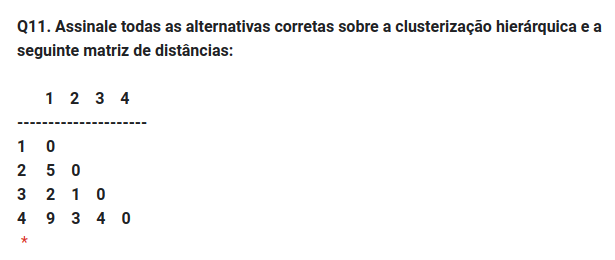


Para resolver a questão, precisamos entender como funciona a clusterização hierárquica e os métodos de linkage especificados na questão:
	1.	Linkage Complete: A distância entre dois grupos é definida como a maior distância entre os elementos de dois clusters.
	2.	Linkage Single: A distância entre dois grupos é definida como a menor distância entre os elementos de dois clusters.


1. “O esquema de ligação ‘complete’ considera a distância entre dois grupos a maior distância entre seus elementos.”

Verdadeiro.
Isso corresponde exatamente à definição do método Complete Linkage.

2. “Considerando a matriz de distâncias acima, quaisquer agrupamentos (n≥1) terá os elementos 2 e 3 no mesmo cluster.”

Falso.
Inicialmente, a distância entre 2 e 3 é 1, o que os tornará o primeiro par a ser agrupado.
Porém, isso não garante que, ao longo do processo de clusterização, eles permanecerão no mesmo cluster quando outros elementos forem adicionados, pois a distância pode aumentar dependendo do método de linkage.

3. “Considerando a matriz de distâncias acima e o linkage complete, segundo elemento a ser adicionado em um agrupamento será o elemento 4.”

Falso.
Com Complete Linkage, a maior distância entre clusters é considerada. O primeiro agrupamento será entre 2 e 3 (distância 1).
Ao avaliar o próximo agrupamento:
	•	Distância entre {2,3} e 1: máx(2, 5) = 5.
	•	Distância entre {2,3} e 4: máx(3, 4) = 4.

Portanto, o elemento 1 será o próximo a ser agrupado, pois tem maior proximidade ao conjunto {2,3} no Complete Linkage.

4. “Considerando a matriz de distâncias acima e o linkage single, segundo elemento a ser adicionado em um agrupamento será o elemento 4.”

Falso.
Com Single Linkage, a menor distância entre clusters é considerada. O primeiro agrupamento será entre 2 e 3 (distância 1).
Ao avaliar o próximo agrupamento:
	•	Distância entre {2,3} e 1: mín(2, 5) = 2.
	•	Distância entre {2,3} e 4: mín(3, 4) = 3.

Logo, o elemento 1 será o próximo a ser agrupado.



----------



	1.	“Idealmente os resíduos do modelo ARIMA devem ter uma distribuição normal e erros não correlacionados.”

Verdadeiro.
Os resíduos de um modelo ARIMA idealmente devem seguir uma distribuição normal com média zero e não devem apresentar autocorrelação, indicando que o modelo capturou adequadamente os padrões da série.

	2.	“A confiança dos valores previstos de uma série aumenta à medida que o tempo se distancia da série original.”

Falso.
À medida que o horizonte de previsão aumenta, a incerteza dos valores previstos tende a crescer, reduzindo a confiança nas previsões. Isso ocorre porque os erros acumulados ao longo do tempo tornam os valores futuros menos confiáveis.

	3.	“O modelo AR é um modelo de regressão linear sobre valores passados da série.”

Verdadeiro.
O modelo AR (Auto-Regressive) usa uma regressão linear em que as variáveis explicativas são os próprios valores passados da série. Por exemplo, no modelo ￼, o valor atual é explicado por até ￼ valores passados.

	4.	“Ciclos são padrões que se repetem na série ao longo do tempo, como maior número de vendas no Natal ou maiores temperaturas no verão.”

Falso.
Os padrões que se repetem em intervalos regulares, como vendas no Natal ou temperaturas no verão, são chamados de sazonalidade.
Ciclos geralmente se referem a padrões de longo prazo e não necessariamente regulares, como flutuações econômicas.

	5.	“Séries podem apresentar um comportamento estacionário mesmo tendo o teste de Adfuller com p<0.05.”

Falso.
Um teste de Dickey-Fuller (ADF) com ￼ indica que a série não possui uma raiz unitária e, portanto, é estacionária. Se ￼, a série é considerada não estacionária. Não é possível ter estacionariedade com ￼ do teste ADF.


_____


	1.	“A série no modelo ARIMA precisa ser estacionária.”

Falso.
Embora o modelo ARIMA seja usado para séries temporais não estacionárias, ele inclui um componente de diferenciação (￼, de “integrated”) que transforma a série em estacionária antes de aplicar os modelos AR e MA. Portanto, a série original não precisa ser estacionária, mas o modelo trabalha com uma versão estacionária da série.

	2.	“A série no modelo ARMA precisa ser estacionária.”

Verdadeiro.
O modelo ARMA requer que a série seja estacionária, pois não inclui o componente de diferenciação presente no ARIMA. Séries não estacionárias devem ser transformadas (por diferenciação ou outras técnicas) antes de aplicar um modelo ARMA.

	3.	“O modelo ARIMA(1,0,3) é um modelo ARMA.”

Verdadeiro.
Um modelo ARIMA(￼) com ￼ não requer diferenciação, o que o torna equivalente a um modelo ARMA(￼).

	4.	“A depender da série, um modelo de médias móveis pode ser suficiente para aproximar uma série.”

Verdadeiro.
Para algumas séries temporais, um modelo de médias móveis (￼) pode capturar suficientemente bem a estrutura dos dados, especialmente quando a série exibe padrões baseados em choques passados (ruídos autocorrelacionados).

	5.	“A estacionariedade se caracteriza pela manutenção das estatísticas dos valores da série ao longo do tempo.”

Verdadeiro.
A estacionariedade implica que as estatísticas da série (como média, variância e autocorrelação) permaneçam constantes ao longo do tempo.